In [1082]:
import pandas as pd
import requests
import random
from time import sleep
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import numpy as np
import nltk
import os
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import datetime
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import learning_curve
import matplotlib.style as style

%matplotlib inline
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [1083]:
df = pd.read_pickle("Data/Prophet_Forecast.pkl")

df.head(50)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,Calories_Dinner,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-12-16,186.014727,183.563919,187.609668,185.277094,186.690594,-0.046333,-0.134713,0.042960,0.120041,...,0.070010,-0.141900,0.282402,-0.500755,-0.772576,-0.251901,0.0,0.0,0.0,185.583982
1,2016-12-17,186.007385,183.609568,188.096218,185.293783,186.664203,0.139448,-0.129295,0.405446,0.023334,...,0.128500,-0.112813,0.329180,-0.425044,-0.711686,-0.140398,0.0,0.0,0.0,185.710840
2,2016-12-18,186.000042,184.586898,188.967603,185.311487,186.637811,-0.072462,-0.210683,0.067186,-0.208608,...,0.524052,0.084301,0.920898,0.178256,-0.143734,0.473283,0.0,0.0,0.0,186.702350
3,2016-12-19,185.992700,185.492920,189.815458,185.329230,186.611420,-0.200156,-0.581956,0.185584,0.688588,...,0.650367,0.090773,1.203087,0.987014,0.710789,1.251559,0.0,0.0,0.0,187.630081
4,2016-12-20,185.985357,184.057679,188.645426,185.356295,186.585029,0.125701,-0.116549,0.365477,0.240258,...,-0.091411,-0.904360,0.706407,0.430498,0.190298,0.672110,0.0,0.0,0.0,186.324444
5,2016-12-21,185.978014,183.380317,188.086628,185.380247,186.558190,0.546264,-0.506495,1.588269,0.065769,...,-0.049037,-0.861539,0.829456,-0.158301,-0.434911,0.079743,0.0,0.0,0.0,185.770676
6,2016-12-22,185.970672,183.356612,187.689997,185.411632,186.529936,0.069539,-0.064476,0.202186,0.098098,...,0.048159,-0.471659,0.505433,-0.511668,-0.783882,-0.228734,0.0,0.0,0.0,185.507163
7,2016-12-23,185.963329,183.798990,188.084877,185.436299,186.505855,-0.091734,-0.266718,0.085056,0.120041,...,0.715914,0.283915,1.154967,-0.500755,-0.772576,-0.251901,0.0,0.0,0.0,186.178488
8,2016-12-24,185.955987,183.106595,187.276752,185.454123,186.479463,-0.004358,-0.012671,0.004041,0.023334,...,-0.380466,-0.852724,0.061758,-0.425044,-0.711686,-0.140398,0.0,0.0,0.0,185.150476
9,2016-12-25,185.948644,184.071599,188.331787,185.457326,186.465647,0.105872,-0.098164,0.307824,-0.208608,...,0.034795,-0.232571,0.313455,0.178256,-0.143734,0.473283,0.0,0.0,0.0,186.161695


In [1084]:
original_df = pd.read_pickle("Data/Fitbit_and_MFP_Cleaned.pkl")

original_df.reset_index(inplace=True)

original_df.head(50)

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Fiber_Dinner,Sugar_Dinner,Protein_(g)_Dinner,Vitamin_A_Dinner,Vitamin_C_Dinner,Calcium_Dinner,Iron_Dinner,Weight,Net_Calories,Day_of_week
0,2016-12-16,7949.359551,6.100120,1856.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,4.801786,9.191071,39.676786,9.469643,16.176786,9.782143,11.300000,NaN,NaN,Friday
1,2016-12-17,5514.820225,4.235007,1855.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,4.600000,9.650000,42.591176,13.979412,20.058824,25.000000,24.091176,NaN,NaN,Saturday
2,2016-12-18,4782.921348,3.679812,1855.0,5.146067,15.494382,702.179775,1440.0,85.123596,12.157303,...,5.353488,10.444186,45.627907,17.386047,54.534884,10.860465,23.369767,NaN,-1110.2,Sunday
3,2016-12-19,6743.966292,5.175902,1855.0,4.640449,13.977528,869.786517,1440.0,127.393258,9.348315,...,10.000000,15.000000,5.000000,40.000000,125.000000,10.000000,10.000000,186.800000,-660.1,Monday
4,2016-12-20,7318.181818,5.671428,1854.0,5.215909,15.704545,911.261364,1440.0,148.397727,8.636364,...,1.900000,14.100000,47.700000,18.000000,48.800000,2.500000,25.400000,186.483333,-154.3,Tuesday
5,2016-12-21,7112.386364,5.472372,1854.0,3.909091,11.761364,899.102273,1440.0,155.465909,7.477273,...,4.378022,8.345055,42.856044,11.289011,16.280220,11.697802,21.106593,186.166667,-978.3,Wednesday
6,2016-12-22,7365.511364,5.715491,1854.0,4.420455,13.284091,857.477273,1440.0,145.545455,6.340909,...,4.000000,6.942857,31.000000,9.000000,12.935065,24.000000,23.000000,185.850000,-142.5,Thursday
7,2016-12-23,7949.359551,6.100120,1853.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,4.801786,9.191071,39.676786,9.469643,16.176786,9.782143,11.300000,185.533333,-1036.9,Friday
8,2016-12-24,5514.820225,4.235007,1853.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,4.600000,9.650000,42.591176,13.979412,20.058824,25.000000,24.091176,185.216667,-903.0,Saturday
9,2016-12-25,1178.000000,0.882320,2074.0,3.000000,9.000000,268.000000,1368.0,72.000000,12.157303,...,5.353488,10.444186,45.627907,17.386047,54.534884,10.860465,23.369767,184.900000,NaN,Sunday


In [1085]:
orig_weight = original_df[['Date', 'Weight']]

orig_weight = pd.DataFrame(orig_weight)

orig_weight

,Date,Weight
0,2016-12-16,NaN
1,2016-12-17,NaN
2,2016-12-18,NaN
3,2016-12-19,186.800000
4,2016-12-20,186.483333
5,2016-12-21,186.166667
6,2016-12-22,185.850000
7,2016-12-23,185.533333
8,2016-12-24,185.216667
9,2016-12-25,184.900000


In [1086]:
df = df.merge(orig_weight, left_on='ds', right_on='Date', how='left')

df.drop(columns=['ds'], inplace=True)

df

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,Calories_Dinner,Calories_Dinner_lower,...,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,Date,Weight
0,186.014727,183.563919,187.609668,185.277094,186.690594,-0.046333,-0.134713,0.042960,0.120041,0.018291,...,0.282402,-0.500755,-0.772576,-0.251901,0.0,0.0,0.0,185.583982,2016-12-16,NaN
1,186.007385,183.609568,188.096218,185.293783,186.664203,0.139448,-0.129295,0.405446,0.023334,0.003555,...,0.329180,-0.425044,-0.711686,-0.140398,0.0,0.0,0.0,185.710840,2016-12-17,NaN
2,186.000042,184.586898,188.967603,185.311487,186.637811,-0.072462,-0.210683,0.067186,-0.208608,-0.404990,...,0.920898,0.178256,-0.143734,0.473283,0.0,0.0,0.0,186.702350,2016-12-18,NaN
3,185.992700,185.492920,189.815458,185.329230,186.611420,-0.200156,-0.581956,0.185584,0.688588,0.104920,...,1.203087,0.987014,0.710789,1.251559,0.0,0.0,0.0,187.630081,2016-12-19,186.800000
4,185.985357,184.057679,188.645426,185.356295,186.585029,0.125701,-0.116549,0.365477,0.240258,0.036608,...,0.706407,0.430498,0.190298,0.672110,0.0,0.0,0.0,186.324444,2016-12-20,186.483333
5,185.978014,183.380317,188.086628,185.380247,186.558190,0.546264,-0.506495,1.588269,0.065769,0.010021,...,0.829456,-0.158301,-0.434911,0.079743,0.0,0.0,0.0,185.770676,2016-12-21,186.166667
6,185.970672,183.356612,187.689997,185.411632,186.529936,0.069539,-0.064476,0.202186,0.098098,0.014947,...,0.505433,-0.511668,-0.783882,-0.228734,0.0,0.0,0.0,185.507163,2016-12-22,185.850000
7,185.963329,183.798990,188.084877,185.436299,186.505855,-0.091734,-0.266718,0.085056,0.120041,0.018291,...,1.154967,-0.500755,-0.772576,-0.251901,0.0,0.0,0.0,186.178488,2016-12-23,185.533333
8,185.955987,183.106595,187.276752,185.454123,186.479463,-0.004358,-0.012671,0.004041,0.023334,0.003555,...,0.061758,-0.425044,-0.711686,-0.140398,0.0,0.0,0.0,185.150476,2016-12-24,185.216667
9,185.948644,184.071599,188.331787,185.457326,186.465647,0.105872,-0.098164,0.307824,-0.208608,-0.404990,...,0.313455,0.178256,-0.143734,0.473283,0.0,0.0,0.0,186.161695,2016-12-25,184.900000


In [1087]:
df['diff_weight'] = df['Weight'].diff()


df['diff_weight_lag1'] = df['diff_weight'].shift(1)
df['diff_weight_weekly_lag'] = df['diff_weight'].shift(7)

df.head(20)

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,Calories_Dinner,Calories_Dinner_lower,...,Date,Weight,diff_weight,diff_weight_lag1,diff_weight_weekly_lag,Prophet_pred_lag1,Prophet_pred_lag2,Prophet_pred_lag3,Prophet_pred_lag4,Prophet_pred_lag5
0,186.014727,183.563919,187.609668,185.277094,186.690594,-0.046333,-0.134713,0.042960,0.120041,0.018291,...,2016-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,186.007385,183.609568,188.096218,185.293783,186.664203,0.139448,-0.129295,0.405446,0.023334,0.003555,...,2016-12-17,NaN,NaN,NaN,NaN,185.583982,NaN,NaN,NaN,NaN
2,186.000042,184.586898,188.967603,185.311487,186.637811,-0.072462,-0.210683,0.067186,-0.208608,-0.404990,...,2016-12-18,NaN,NaN,NaN,NaN,185.710840,185.583982,NaN,NaN,NaN
3,185.992700,185.492920,189.815458,185.329230,186.611420,-0.200156,-0.581956,0.185584,0.688588,0.104920,...,2016-12-19,186.800000,NaN,NaN,NaN,186.702350,185.710840,185.583982,NaN,NaN
4,185.985357,184.057679,188.645426,185.356295,186.585029,0.125701,-0.116549,0.365477,0.240258,0.036608,...,2016-12-20,186.483333,-0.316667,NaN,NaN,187.630081,186.702350,185.710840,185.583982,NaN
5,185.978014,183.380317,188.086628,185.380247,186.558190,0.546264,-0.506495,1.588269,0.065769,0.010021,...,2016-12-21,186.166667,-0.316667,-0.316667,NaN,186.324444,187.630081,186.702350,185.710840,185.583982
6,185.970672,183.356612,187.689997,185.411632,186.529936,0.069539,-0.064476,0.202186,0.098098,0.014947,...,2016-12-22,185.850000,-0.316667,-0.316667,NaN,185.770676,186.324444,187.630081,186.702350,185.710840
7,185.963329,183.798990,188.084877,185.436299,186.505855,-0.091734,-0.266718,0.085056,0.120041,0.018291,...,2016-12-23,185.533333,-0.316667,-0.316667,NaN,185.507163,185.770676,186.324444,187.630081,186.702350
8,185.955987,183.106595,187.276752,185.454123,186.479463,-0.004358,-0.012671,0.004041,0.023334,0.003555,...,2016-12-24,185.216667,-0.316667,-0.316667,NaN,186.178488,185.507163,185.770676,186.324444,187.630081
9,185.948644,184.071599,188.331787,185.457326,186.465647,0.105872,-0.098164,0.307824,-0.208608,-0.404990,...,2016-12-25,184.900000,-0.316667,-0.316667,NaN,185.150476,186.178488,185.507163,185.770676,186.324444


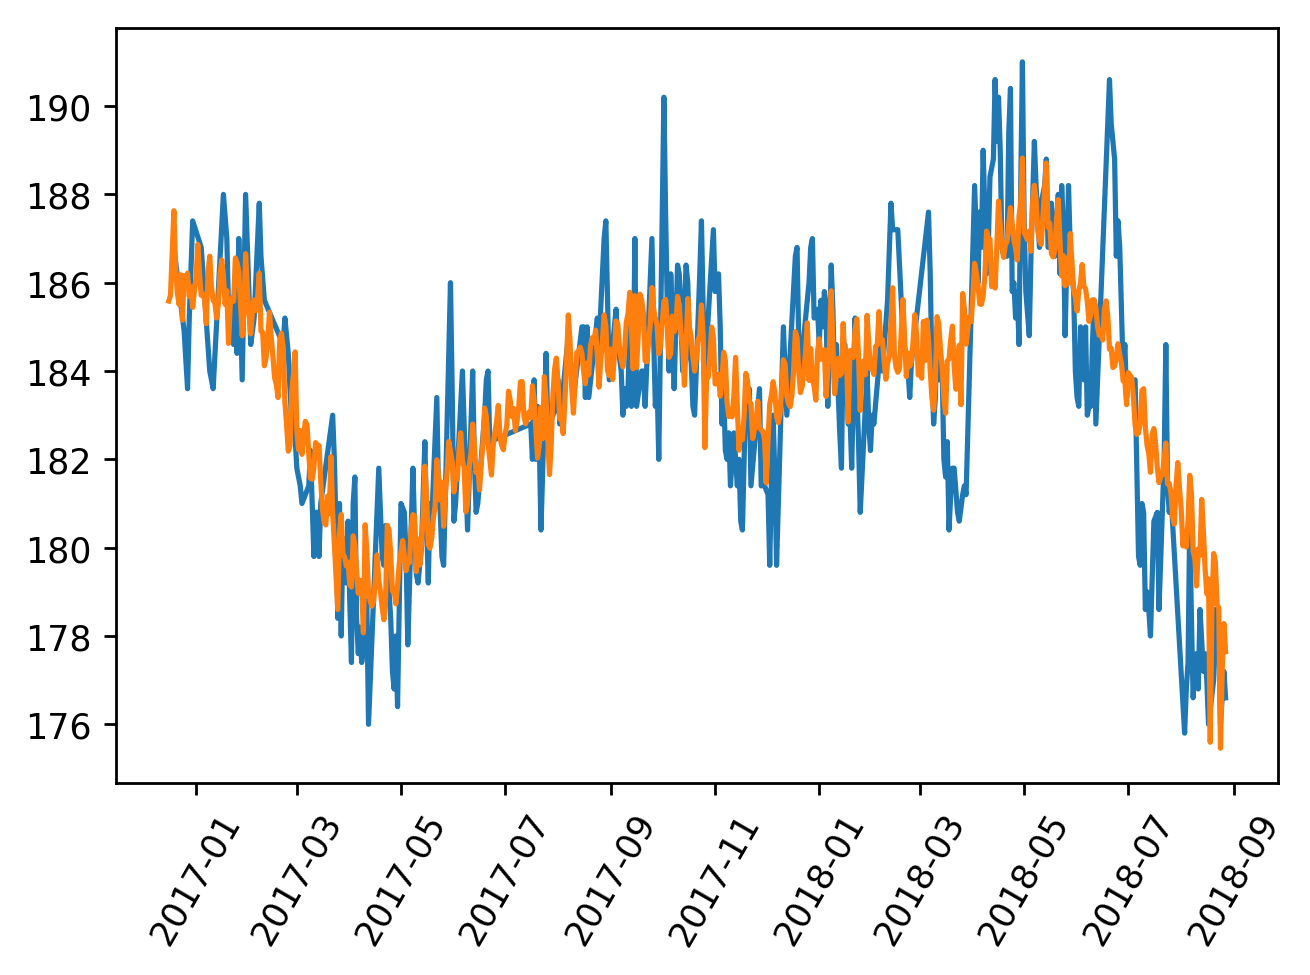

In [1088]:
plt.figure(dpi=250)

plt.plot(df.Date,df.Weight)
plt.plot(df.Date, df.yhat)

plt.xticks(rotation=60);

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text xticklabel objects>)

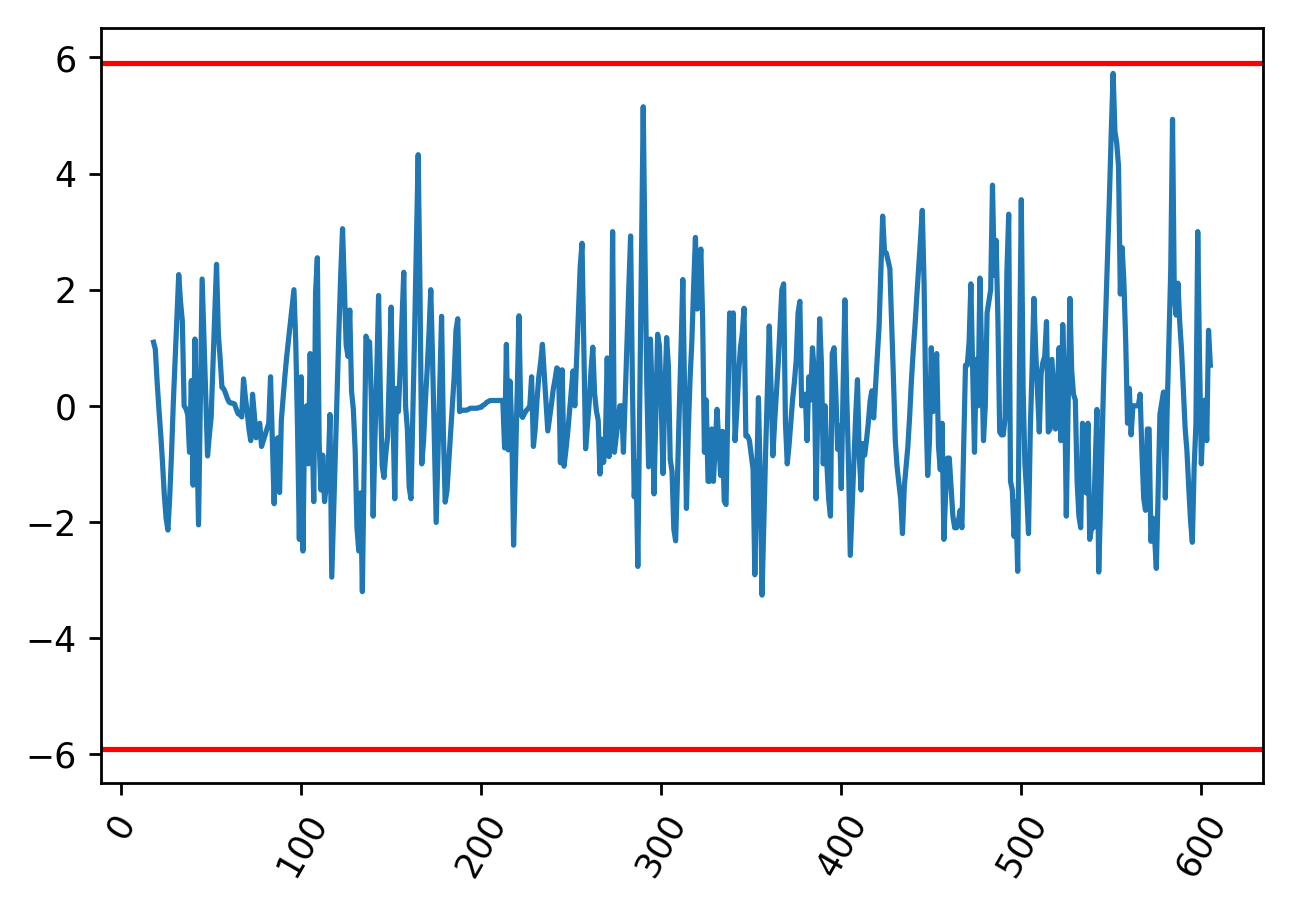

In [1089]:
df['Median_Weight'] = df['Weight'].rolling(30, center=True).median()
df['Std_Weight'] = df['Weight'].rolling(30, center=True).std()
std_dev = df['Weight'].std()

df['residual'] = df['Weight'] - df['Median_Weight']

plt.figure(dpi=250)
plt.plot(df['residual'])
plt.gca().axhline(2*std_dev, c='r')
plt.gca().axhline(-2*std_dev, c='r')
plt.xticks(rotation=60)

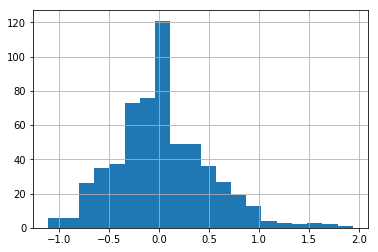

In [1090]:
df['z'] = df['residual'] / std_dev
df['z'].hist(bins=20);

In [1091]:
print('0 diffs:', df['Weight'].std())
print('1 diffs:', df['Weight'].diff().std())
print('2 diffs:', df['Weight'].diff().diff().std())
print('3 diffs:', df['Weight'].diff().diff().diff().std())

0 diffs: 2.95515957446908
1 diffs: 1.160816534567066
2 diffs: 1.658913357728994
3 diffs: 2.7829457480930295


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text xticklabel objects>)

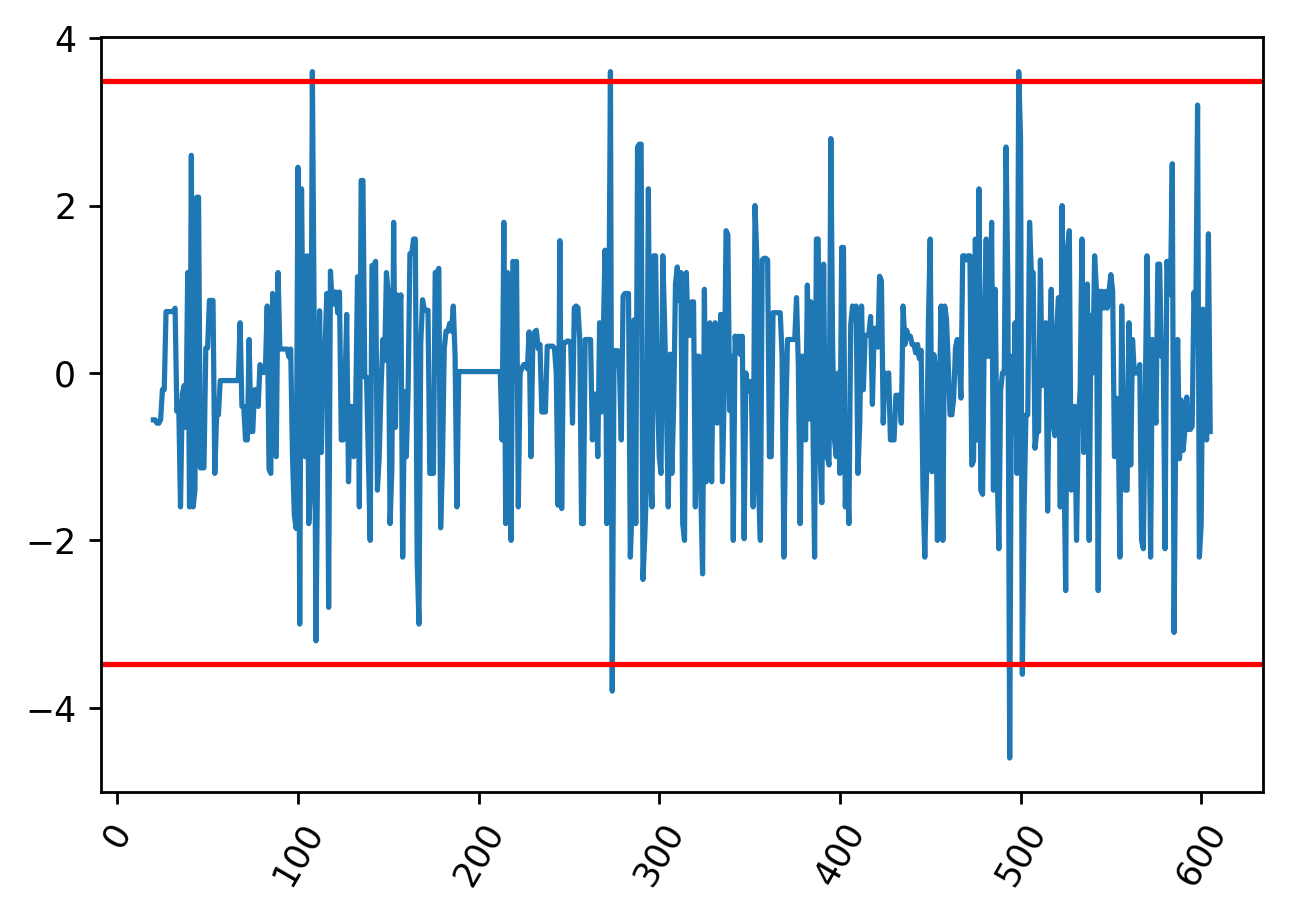

In [1092]:
df['Median_Weight'] = df['Weight'].diff().rolling(30, center=True).median()
df['Std_Weight'] = df['Weight'].diff().rolling(30, center=True).std()
std_dev = df['Weight'].diff().std()

df['residual'] = df['Weight'].diff() - df['Median_Weight'].diff()

plt.figure(dpi=250)
plt.plot(df['residual'])
plt.gca().axhline(3*std_dev, c='r')
plt.gca().axhline(-3*std_dev, c='r')
plt.xticks(rotation=60)

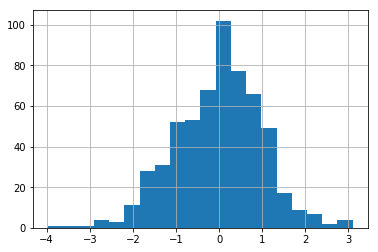

In [1093]:
df['z'] = df['residual'] / std_dev
df['z'].hist(bins=20);

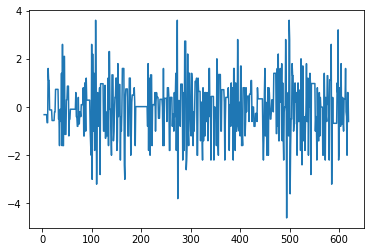

In [1094]:
# Plot diff of weight over time
df.Weight.diff().plot();

In [1095]:
# Plot diff of weight over time
#df.Weight_MA7.diff().diff().plot();

In [1096]:
# Plot diff of weight over time
#df.Weight_MA30.diff().diff().plot();

In [1097]:
print(len(df))
print(df.Weight[:150].mean())
print(df.Weight[150:300].mean())
print(df.Weight[300:450].mean())
print(df.Weight[450:].mean())

620
182.66122448979598
183.4406666666667
184.13199999999998
183.6111764705881


In [1098]:
df[['Weight', 'diff_weight', 'diff_weight_lag1']]

,Weight,diff_weight,diff_weight_lag1
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,186.800000,NaN,NaN
4,186.483333,-0.316667,NaN
5,186.166667,-0.316667,-0.316667
6,185.850000,-0.316667,-0.316667
7,185.533333,-0.316667,-0.316667
8,185.216667,-0.316667,-0.316667
9,184.900000,-0.316667,-0.316667


In [1099]:
for i in range(1,8):
    df[f'Weight_lag{i}'] = df['Weight'].shift(i)
    
for i in range(1,8):
    df[f'Prophet_pred_lag{i}'] = df['yhat'].shift(i)

X = df.iloc[:,-6:]
X.head(20)

,z,Weight_lag1,Weight_lag2,Weight_lag3,Weight_lag4,Weight_lag5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,186.800000,NaN,NaN,NaN,NaN
5,NaN,186.483333,186.800000,NaN,NaN,NaN
6,NaN,186.166667,186.483333,186.800000,NaN,NaN
7,NaN,185.850000,186.166667,186.483333,186.800000,NaN
8,NaN,185.533333,185.850000,186.166667,186.483333,186.800000
9,NaN,185.216667,185.533333,185.850000,186.166667,186.483333


In [1100]:
df['Weight']

0             NaN
1             NaN
2             NaN
3      186.800000
4      186.483333
5      186.166667
6      185.850000
7      185.533333
8      185.216667
9      184.900000
10     184.250000
11     183.600000
12     185.200000
13     186.300000
14     187.400000
15     187.280000
16     187.160000
17     187.040000
18     186.920000
19     186.800000
20     186.240000
21     185.680000
22     185.120000
23     184.560000
24     184.000000
25     183.800000
26     183.600000
27     184.333333
28     185.066667
29     185.800000
          ...    
590    179.175000
591    178.500000
592    177.825000
593    177.150000
594    176.475000
595    175.800000
596    176.800000
597    177.400000
598    180.600000
599    178.400000
600    176.600000
601    177.400000
602    177.600000
603    176.800000
604    178.600000
605    177.900000
606    177.200000
607    177.600000
608    177.000000
609    176.000000
610    176.333333
611    176.666667
612    177.000000
613    178.600000
614    178

In [1102]:
# for i in range(2,8):
#     df[f'diff_weight_MA{i}'] = df['diff_weight_lag1'].rolling(window=i).mean()

# X = df[['Weight', 'diff_weight', 'diff_weight_lag1', 'diff_weight_lag2', 'diff_weight_lag3',
#              'diff_weight_lag4', 'diff_weight_lag5', 'diff_weight_MA2',
#              'diff_weight_MA3', 'diff_weight_MA4', 'diff_weight_MA5', 'diff_weight_MA6', 'diff_weight_MA7']]
# X.head(20)

## CREATE FINAL HOLDOUT TEST SET (LASTMONTH)

In [1103]:
df.Weight[-45:]

575    178.000000
576    179.300000
577    180.600000
578    180.700000
579    180.800000
580    178.600000
581    179.733333
582    180.866667
583    182.000000
584    184.600000
585    181.400000
586    180.800000
587    181.200000
588    180.525000
589    179.850000
590    179.175000
591    178.500000
592    177.825000
593    177.150000
594    176.475000
595    175.800000
596    176.800000
597    177.400000
598    180.600000
599    178.400000
600    176.600000
601    177.400000
602    177.600000
603    176.800000
604    178.600000
605    177.900000
606    177.200000
607    177.600000
608    177.000000
609    176.000000
610    176.333333
611    176.666667
612    177.000000
613    178.600000
614    178.400000
615    178.000000
616    176.000000
617    176.600000
618    177.200000
619    176.600000
Name: Weight, dtype: float64

In [1104]:
train_df = df[:575]

holdout_df = df[575:]

In [1105]:
# eighty_percent

In [1106]:
df

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,Calories_Dinner,Calories_Dinner_lower,...,Weight_lag2,Weight_lag3,Weight_lag4,Weight_lag5,diff_weight_MA2,diff_weight_MA3,diff_weight_MA4,diff_weight_MA5,diff_weight_MA6,diff_weight_MA7
0,186.014727,183.563919,187.609668,185.277094,186.690594,-0.046333,-0.134713,0.042960,0.120041,0.018291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,186.007385,183.609568,188.096218,185.293783,186.664203,0.139448,-0.129295,0.405446,0.023334,0.003555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,186.000042,184.586898,188.967603,185.311487,186.637811,-0.072462,-0.210683,0.067186,-0.208608,-0.404990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,185.992700,185.492920,189.815458,185.329230,186.611420,-0.200156,-0.581956,0.185584,0.688588,0.104920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,185.985357,184.057679,188.645426,185.356295,186.585029,0.125701,-0.116549,0.365477,0.240258,0.036608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,185.978014,183.380317,188.086628,185.380247,186.558190,0.546264,-0.506495,1.588269,0.065769,0.010021,...,186.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,185.970672,183.356612,187.689997,185.411632,186.529936,0.069539,-0.064476,0.202186,0.098098,0.014947,...,186.483333,186.800000,NaN,NaN,-0.316667,NaN,NaN,NaN,NaN,NaN
7,185.963329,183.798990,188.084877,185.436299,186.505855,-0.091734,-0.266718,0.085056,0.120041,0.018291,...,186.166667,186.483333,186.800000,NaN,-0.316667,-0.316667,NaN,NaN,NaN,NaN
8,185.955987,183.106595,187.276752,185.454123,186.479463,-0.004358,-0.012671,0.004041,0.023334,0.003555,...,185.850000,186.166667,186.483333,186.800000,-0.316667,-0.316667,-0.316667,NaN,NaN,NaN
9,185.948644,184.071599,188.331787,185.457326,186.465647,0.105872,-0.098164,0.307824,-0.208608,-0.404990,...,185.533333,185.850000,186.166667,186.483333,-0.316667,-0.316667,-0.316667,-0.316667,NaN,NaN


In [1107]:
holdout_df

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,Calories_Dinner,Calories_Dinner_lower,...,Weight_lag2,Weight_lag3,Weight_lag4,Weight_lag5,diff_weight_MA2,diff_weight_MA3,diff_weight_MA4,diff_weight_MA5,diff_weight_MA6,diff_weight_MA7
575,182.486185,179.468546,184.009634,181.938585,183.061416,0.130903,-0.121373,0.380603,0.023334,0.003555,...,179.000000,178.600000,180.800000,181.000000,0.000000,-0.733333,-0.600000,-0.200000,-0.200000,-0.457143
576,182.399681,180.306943,184.685848,181.846799,182.987958,0.105872,-0.098164,0.307824,0.304899,0.046457,...,178.600000,179.000000,178.600000,180.800000,-0.500000,-0.200000,-0.700000,-0.600000,-0.266667,-0.257143
577,182.313178,180.646937,184.897011,181.750992,182.919659,-0.229005,-0.665836,0.212333,-0.045706,-0.088733,...,178.000000,178.600000,179.000000,178.600000,0.350000,0.100000,0.175000,-0.300000,-0.283333,-0.042857
578,182.226674,180.268075,184.503403,181.653258,182.843964,-0.229005,-0.665836,0.212333,-0.011520,-0.022364,...,179.300000,178.000000,178.600000,179.000000,1.300000,0.666667,0.400000,0.400000,-0.033333,-0.057143
579,182.140171,179.485587,184.048466,181.557064,182.768486,-0.126495,-0.367786,0.117286,0.065769,0.010021,...,180.600000,179.300000,178.000000,178.600000,0.700000,0.900000,0.525000,0.340000,0.350000,-0.014286
580,182.053667,179.325731,183.634307,181.457791,182.692753,-0.057564,-0.167368,0.053373,0.120800,0.018406,...,180.700000,180.600000,179.300000,178.000000,0.100000,0.500000,0.700000,0.440000,0.300000,0.314286
581,181.967164,179.565606,183.741673,181.359193,182.624929,-0.046333,-0.134713,0.042960,0.120041,0.018291,...,180.800000,180.700000,180.600000,179.300000,-1.050000,-0.666667,-0.175000,0.120000,0.000000,-0.057143
582,181.880660,179.467638,183.928381,181.244423,182.557117,0.139448,-0.129295,0.405446,0.023334,0.003555,...,178.600000,180.800000,180.700000,180.600000,-0.533333,-0.322222,-0.216667,0.086667,0.288889,0.161905
583,181.794157,179.985926,184.339078,181.129960,182.489428,0.105872,-0.098164,0.307824,-0.208608,-0.404990,...,179.733333,178.600000,180.800000,180.700000,1.133333,0.022222,0.041667,0.053333,0.261111,0.409524
584,181.707653,180.274679,184.718670,181.015035,182.423888,-0.057564,-0.167368,0.053373,0.168332,0.025649,...,180.866667,179.733333,178.600000,180.800000,1.133333,1.133333,0.300000,0.260000,0.233333,0.385714


In [1108]:
# print Sales autocorrelation for k=1,2
print(train_df.Weight.diff().autocorr(lag=1)) 
print(train_df.Weight.diff().autocorr(lag=2))
print(train_df.Weight.diff().autocorr(lag=3)) 
print(train_df.Weight.diff().autocorr(lag=4))
print(train_df.Weight.diff().autocorr(lag=5)) 
print(train_df.Weight.diff().autocorr(lag=6))
print(train_df.Weight.diff().autocorr(lag=7)) 

-0.015353826576690271
-0.21363612356930362
-0.06938126286829933
-0.13059382826549898
-0.08804580833045414
0.10065931654310796
0.13471658527785288


In [1109]:
# # print Sales autocorrelation for k=1,2
# print(train_df.diff_weight_MA_7.autocorr(lag=1)) 
# print(train_df.diff_weight_MA_7.autocorr(lag=2))
# print(train_df.diff_weight_MA_7.autocorr(lag=3)) 
# print(train_df.diff_weight_MA_7.autocorr(lag=4))
# print(train_df.diff_weight_MA_7.autocorr(lag=5)) 
# print(train_df.diff_weight_MA_7.autocorr(lag=6))
# print(train_df.diff_weight_MA_7.autocorr(lag=7)) 

In [1110]:
# create autocorr plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # better and more arguments

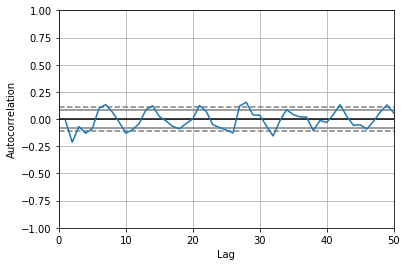

In [1111]:
autocorrelation_plot(train_df.Weight.diff()[4:])
plt.xlim(0,50);
# we see corr at 12 and 24 because Sundays are all closed for store 1, so weeks are now six days long

Figure(432x288)
Figure(432x288)


<Figure size 900x600 with 0 Axes>

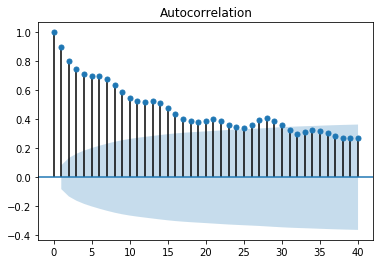

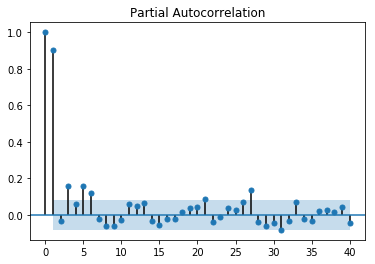

In [1112]:
# create autocorr plot
# plot autocorr with statsmodel
plt.figure(dpi=150)
print(plot_acf(train_df.Weight.dropna(), lags=40)) # these are for non-stationary data, so we can see patterns, but generally ignore
print(plot_pacf(train_df.Weight.dropna(), lags=40))

In [1113]:
# from  statsmodels.tsa.seasonal  import seasonal_decompose
# ss_decomposition = seasonal_decompose(x=train_df.Weight[4:], 
#                                       model='additive')
# trend = ss_decomposition.trend
# seasonal = ss_decomposition.seasonal
# residual = ss_decomposition.resid

# fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
# fig.set_figheight(10)
# fig.set_figwidth(15)

# axes[0].plot(train_df.Weight, 'k', label='Original')
# axes[0].legend(loc='upper left');

# axes[1].plot(trend, label='Trend')
# axes[1].legend(loc='upper left');

# axes[2].plot(seasonal, 'g', label='Seasonality')
# axes[2].legend(loc='upper left');

# axes[3].plot(residual, 'r', label='Residuals')
# axes[3].legend(loc='upper left')

In [1114]:
# from  statsmodels.tsa.seasonal  import seasonal_decompose
# ss_decomposition = seasonal_decompose(x=train_df.diff_weight.dropna(), 
#                                       model='additive')
# trend = ss_decomposition.trend
# seasonal = ss_decomposition.seasonal
# residual = ss_decomposition.resid

# fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
# fig.set_figheight(10)
# fig.set_figwidth(15)

# axes[0].plot(train_df.diff_weight, 'k', label='Original')
# axes[0].legend(loc='upper left');

# axes[1].plot(trend, label='Trend')
# axes[1].legend(loc='upper left');

# axes[2].plot(seasonal, 'g', label='Seasonality')
# axes[2].legend(loc='upper left');

# axes[3].plot(residual, 'r', label='Residuals')
# axes[3].legend(loc='upper left')

In [1115]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7, center=True).mean()
    rolstd = timeseries.rolling(window=7, center=True).std()

    #Plot rolling statistics:
    plt.figure(dpi=150)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    
    plt.draw()
    plt.legend(loc='best')
    plt.xticks(rotation=60)
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    timeseries.dropna(inplace=True)
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

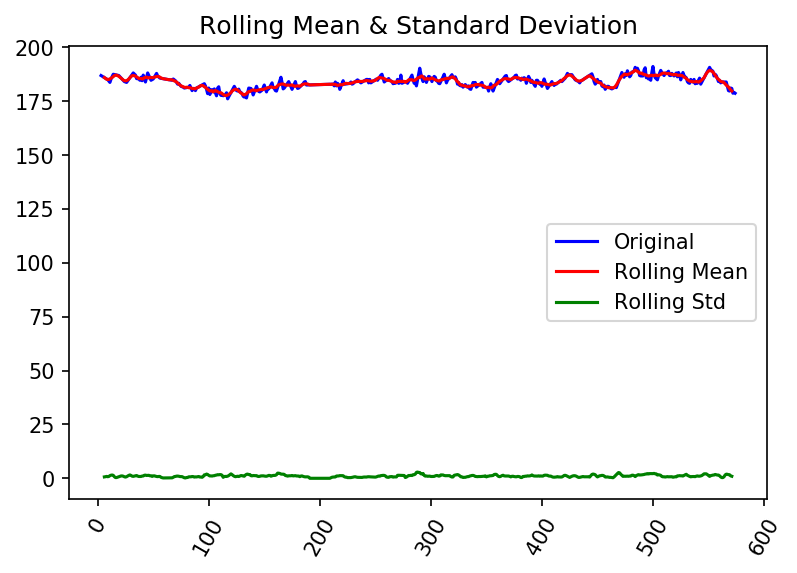

Results of Dickey-Fuller Test:
Test Statistic                  -3.140008
p-value                          0.023731
#Lags Used                       8.000000
Number of Observations Used    563.000000
Critical Value (1%)             -3.442019
Critical Value (5%)             -2.866687
Critical Value (10%)            -2.569511
dtype: float64


/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:3896: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [1116]:
test_stationarity(train_df.Weight)

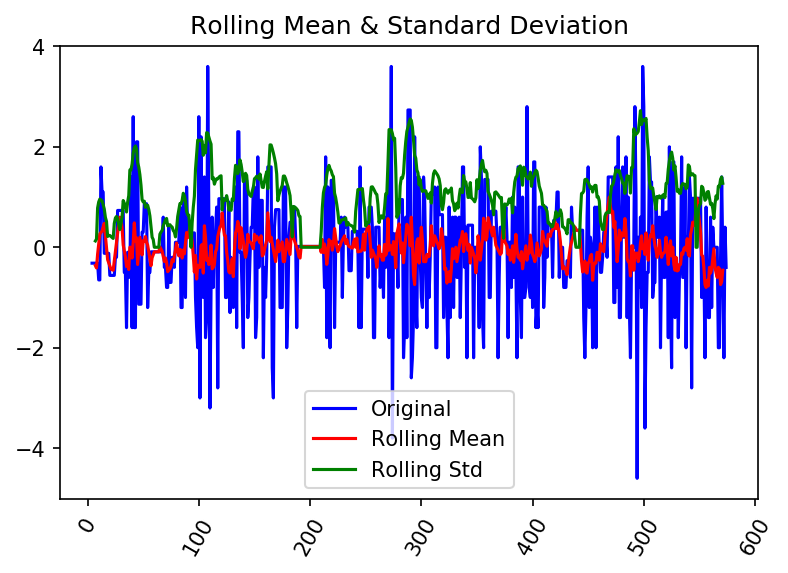

Results of Dickey-Fuller Test:
Test Statistic                -8.591556e+00
p-value                        7.262882e-14
#Lags Used                     1.100000e+01
Number of Observations Used    5.590000e+02
Critical Value (1%)           -3.442102e+00
Critical Value (5%)           -2.866724e+00
Critical Value (10%)          -2.569531e+00
dtype: float64


/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:3896: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [1117]:
test_stationarity(train_df.diff_weight)

In [1118]:
train_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,Calories_Dinner,Calories_Dinner_lower,...,Weight_lag2,Weight_lag3,Weight_lag4,Weight_lag5,diff_weight_MA2,diff_weight_MA3,diff_weight_MA4,diff_weight_MA5,diff_weight_MA6,diff_weight_MA7
0,186.014727,183.563919,187.609668,185.277094,186.690594,-0.046333,-0.134713,0.042960,0.120041,0.018291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,186.007385,183.609568,188.096218,185.293783,186.664203,0.139448,-0.129295,0.405446,0.023334,0.003555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,186.000042,184.586898,188.967603,185.311487,186.637811,-0.072462,-0.210683,0.067186,-0.208608,-0.404990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,185.992700,185.492920,189.815458,185.329230,186.611420,-0.200156,-0.581956,0.185584,0.688588,0.104920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,185.985357,184.057679,188.645426,185.356295,186.585029,0.125701,-0.116549,0.365477,0.240258,0.036608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1119]:
# df2 = df[np.isfinite(df['diff_weight'])]

In [1120]:
# df2

In [1121]:
# ar1 = LinearRegression()

# X = df2.iloc[1:, -1].values.reshape(-1,1)
# target= df2['diff_weight'].values[1:]
# ar1.fit(X[:], target[:])

# plt.figure(dpi=250)
# plt.plot(df2.index[1:], target, label='actual')
# plt.plot(df2.index[1:], ar1.predict(X[:]), label='predicted')
# plt.xticks(rotation=60)
# plt.xlabel('Date')
# plt.ylabel('diff_weight')
# plt.title('Time Series of Weight (1 Day RWindow)')

In [1122]:
# ar1.score(X[1:], target[1:])

In [1123]:
for i in range(1,6):
    train_df[f'lag{i}'] = train_df['diff_weight'].shift(i)

X = train_df.iloc[:,-7:]
X.head(20)

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,diff_weight_MA6,diff_weight_MA7,lag1,lag2,lag3,lag4,lag5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,-0.316667,NaN,NaN,NaN,NaN
6,NaN,NaN,-0.316667,-0.316667,NaN,NaN,NaN
7,NaN,NaN,-0.316667,-0.316667,-0.316667,NaN,NaN
8,NaN,NaN,-0.316667,-0.316667,-0.316667,-0.316667,NaN
9,NaN,NaN,-0.316667,-0.316667,-0.316667,-0.316667,-0.316667


In [1124]:
X = X.dropna()
y = train_df.loc[X.index[:-1], 'diff_weight']
X = X[:-1]

ar7 = LinearRegression()
ar7.fit(X, y)
ar7.score(X,y)

0.11143669731803287

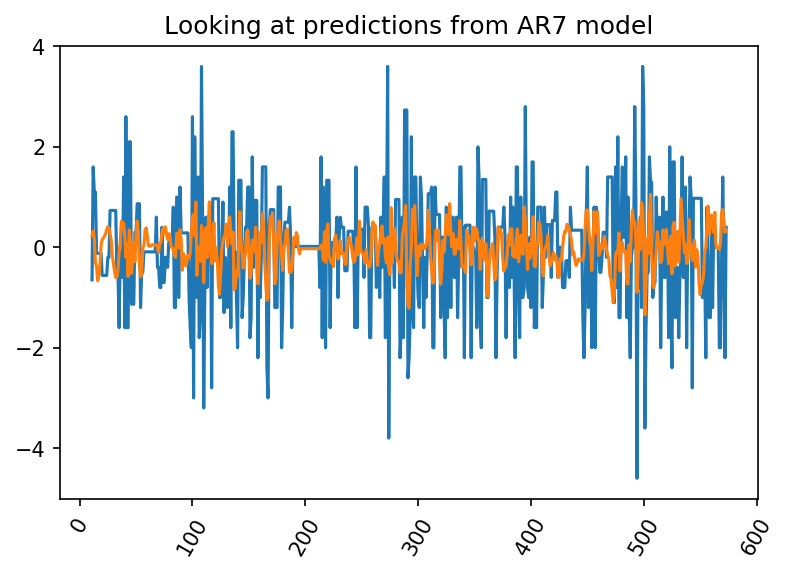

In [1125]:
plt.figure(dpi=150)
plt.plot(X.index, y)
plt.plot(X.index, ar7.predict(X))
plt.title("Looking at predictions from AR7 model")
plt.xticks(rotation=60);

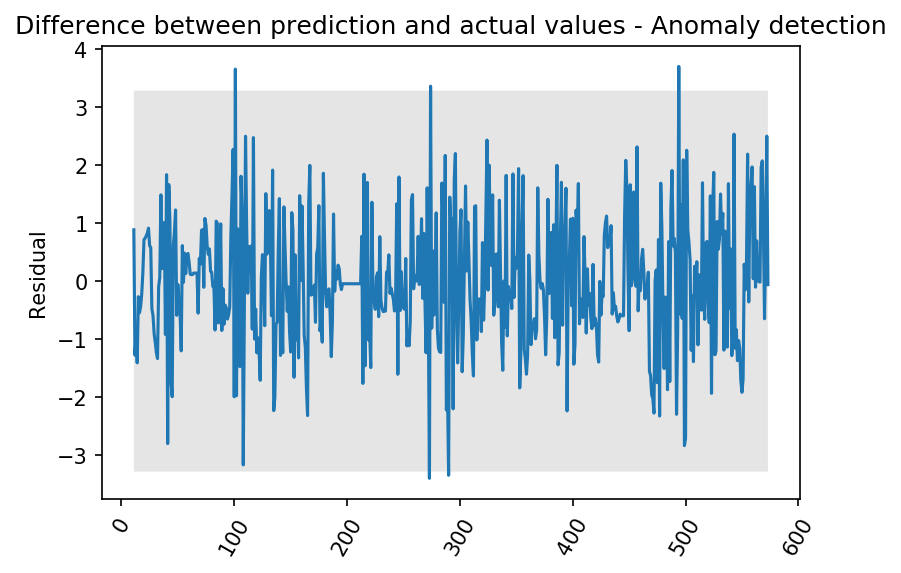

In [1126]:
# Let's look at differences from the prediction:
residual = ar7.predict(X) - y
std_residual = np.std(residual)

plt.figure(dpi=150)
plt.plot(X.index, ar7.predict(X) - y)
plt.gca().fill_between(X.index, 3*std_residual, -3*std_residual, facecolor='gray', alpha=0.2)
plt.title("Difference between prediction and actual values - Anomaly detection")
plt.ylabel("Residual")
plt.xticks(rotation=60);

## POTENTIAL TO PRUNE ANOMALIES FOUND ABOVE

##### 2017-04 AND 2017-10

In [1127]:
train_df['diff_weight'].values

array([        nan,         nan,         nan,         nan, -0.31666667,
       -0.31666667, -0.31666667, -0.31666667, -0.31666667, -0.31666667,
       -0.65      , -0.65      ,  1.6       ,  1.1       ,  1.1       ,
       -0.12      , -0.12      , -0.12      , -0.12      , -0.12      ,
       -0.56      , -0.56      , -0.56      , -0.56      , -0.56      ,
       -0.2       , -0.2       ,  0.73333333,  0.73333333,  0.73333333,
        0.73333333,  0.73333333,  0.73333333, -0.5       , -0.5       ,
       -1.6       , -0.1       , -0.1       , -0.6       ,  1.4       ,
       -1.6       ,  2.6       , -1.6       , -1.6       ,  2.1       ,
        2.1       , -1.13333333, -1.13333333, -1.13333333,  0.3       ,
        0.3       ,  0.86666667,  0.86666667,  0.86666667, -1.2       ,
       -0.5       , -0.5       , -0.09090909, -0.09090909, -0.09090909,
       -0.09090909, -0.09090909, -0.09090909, -0.09090909, -0.09090909,
       -0.09090909, -0.09090909, -0.09090909,  0.6       , -0.4 

In [1128]:
from statsmodels.tsa.arima_model import ARMA, ARIMA

diff_weight = train_df['diff_weight'].values[8:-3]
ar7_no_ma = ARMA(diff_weight, (7,0)).fit()
ar7_no_ma.summary()

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  564
Model:                     ARMA(7, 0)   Log Likelihood                -848.423
Method:                       css-mle   S.D. of innovations              1.089
Date:                Tue, 11 Sep 2018   AIC                           1714.845
Time:                        16:48:10   BIC                           1753.861
Sample:                             0   HQIC                          1730.075
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0075      0.027     -0.282      0.778      -0.060       0.045
ar.L1.y       -0.0828      0.042     -1.969      0.049      -0.165      -0.000
ar.L2.y       -0.2594      0.042     -6.155      0.000      -0.342      -0.177
ar.L3.y       -0.1162      0.043     -2.694      0.007      -0.201      -0.032
ar.L4.y       -0.1965      0.043     -4.605      0.000      -0.280      -0.113
ar.L5.y       -0.1383      0.043     -3.185      0.002      -0.223      -0.053
ar.L6.y        0.0079      0.042      0.188      0.851      -0.075       0.091
ar.L7.y        0.0619      0.042      1.466      0.143      -0.021       0.145
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4885           -0.7187j            1.6529           -0.4284
AR.2           -1.4885           +0.7187j            1.6529            0.4284
AR.3           -0.4227           -1.2751j            1.3433           -0.3009
AR.4           -0.4227           +1.2751j            1.3433            0.3009
AR.5            0.7683           -0.9635j            1.2323           -0.1429
AR.6            0.7683           +0.9635j            1.2323            0.1429
AR.7            2.1575           -0.0000j            2.1575           -0.0000
-----------------------------------------------------------------------------
"""

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


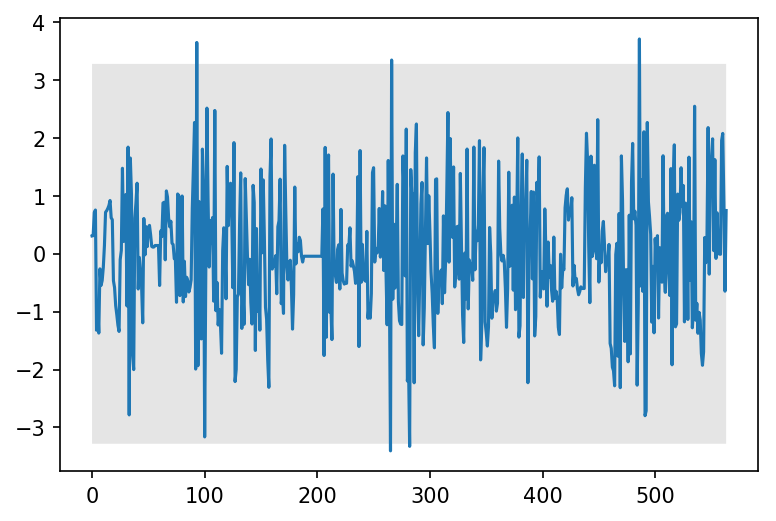

In [1129]:
# plot residuals
# Same as before!
plt.figure(dpi=150)
plt.plot(-ar7_no_ma.resid)
plt.gca().fill_between(range(len(ar7_no_ma.resid)), 3*std_residual, -3*std_residual, facecolor='gray', alpha=0.2);

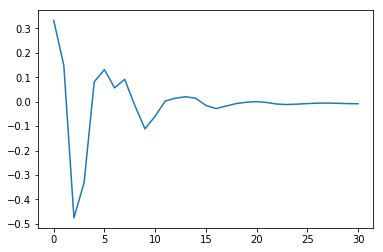

In [1130]:
# forecast and plot for the next 25 periods
plt.plot(ar7_no_ma.forecast(steps=31)[0]);

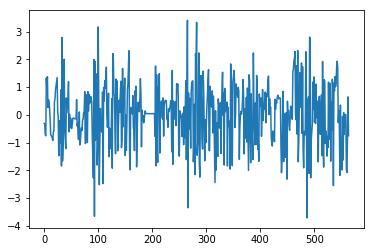

In [1131]:
plt.plot(ar7_no_ma.resid);

Figure(432x288)
Figure(432x288)


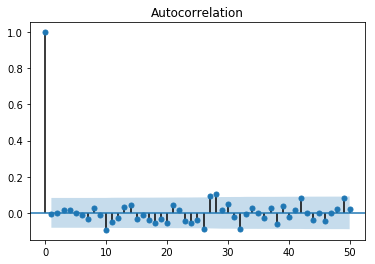

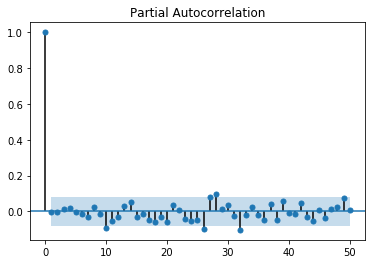

In [1132]:
# plot acf and pacf
print(plot_acf(ar7_no_ma.resid, lags=50)) # small spikes and patterns show model has captured variance?
print(plot_pacf(ar7_no_ma.resid, lags=50))

In [1133]:
dfw = train_df.diff_weight.astype('float')

dfWeight = train_df.Weight.astype('float')

In [1134]:
type(ar7_no_ma.predict())

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


numpy.ndarray

In [1135]:
#diff_weight

# plot actual vs. predicted
# plt.plot(diff_weight,label='actual')
# ar7_no_ma.predict(start=len(diff_weight)//2,end=len(diff_weight)-5).plot(label='reconstruction') # this can't forecast future!!!
# plt.legend()
# plt.title("AR7 (no MA): Comparing actual to reconstruction");

In [1149]:
train_df

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,Calories_Dinner,Calories_Dinner_lower,...,diff_weight_MA3,diff_weight_MA4,diff_weight_MA5,diff_weight_MA6,diff_weight_MA7,lag1,lag2,lag3,lag4,lag5
0,186.014727,183.563919,187.609668,185.277094,186.690594,-0.046333,-0.134713,0.042960,0.120041,0.018291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,186.007385,183.609568,188.096218,185.293783,186.664203,0.139448,-0.129295,0.405446,0.023334,0.003555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,186.000042,184.586898,188.967603,185.311487,186.637811,-0.072462,-0.210683,0.067186,-0.208608,-0.404990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,185.992700,185.492920,189.815458,185.329230,186.611420,-0.200156,-0.581956,0.185584,0.688588,0.104920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,185.985357,184.057679,188.645426,185.356295,186.585029,0.125701,-0.116549,0.365477,0.240258,0.036608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,185.978014,183.380317,188.086628,185.380247,186.558190,0.546264,-0.506495,1.588269,0.065769,0.010021,...,NaN,NaN,NaN,NaN,NaN,-0.316667,NaN,NaN,NaN,NaN
6,185.970672,183.356612,187.689997,185.411632,186.529936,0.069539,-0.064476,0.202186,0.098098,0.014947,...,NaN,NaN,NaN,NaN,NaN,-0.316667,-0.316667,NaN,NaN,NaN
7,185.963329,183.798990,188.084877,185.436299,186.505855,-0.091734,-0.266718,0.085056,0.120041,0.018291,...,-0.316667,NaN,NaN,NaN,NaN,-0.316667,-0.316667,-0.316667,NaN,NaN
8,185.955987,183.106595,187.276752,185.454123,186.479463,-0.004358,-0.012671,0.004041,0.023334,0.003555,...,-0.316667,-0.316667,NaN,NaN,NaN,-0.316667,-0.316667,-0.316667,-0.316667,NaN
9,185.948644,184.071599,188.331787,185.457326,186.465647,0.105872,-0.098164,0.307824,-0.208608,-0.404990,...,-0.316667,-0.316667,-0.316667,NaN,NaN,-0.316667,-0.316667,-0.316667,-0.316667,-0.316667


In [1137]:
# train_df[['diff_weight','diff_weight_MA_1','diff_weight_lag1', 'diff_weight_lag2',
#         'diff_weight_lag3', 'diff_weight_lag4', 'diff_weight_lag5', 'diff_weight_weekly_lag']]

In [1158]:
## RUNNING ON MEAL SPECIFIC MACROS

X = train_df.loc[:, ['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner','Prophet_pred_lag1',
        'Prophet_pred_lag2', 'Prophet_pred_lag3', 'Prophet_pred_lag4', 'Prophet_pred_lag5',
        'Weight_lag1', 'Weight_lag2',
        'Weight_lag3', 'Weight_lag4', 'Weight_lag5']]


X = X.dropna()
y = train_df.loc[X.index, 'Weight']

In [1159]:
# from sklearn.preprocessing import StandardScaler

# ssX = StandardScaler()
# X_scaled = pd.DataFrame(ssX.fit_transform(X), columns = X.columns)

In [1160]:
# X_scaled

In [1161]:
X

,Steps,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Calories_Breakfast,Saturated_Fat_Breakfast,Cholesterol_Breakfast,Polyunsaturated_Fat_Breakfast,Monounsaturated_Fat_Breakfast,...,Prophet_pred_lag1,Prophet_pred_lag2,Prophet_pred_lag3,Prophet_pred_lag4,Prophet_pred_lag5,Weight_lag1,Weight_lag2,Weight_lag3,Weight_lag4,Weight_lag5
8,-0.017921,-0.102232,0.078604,-0.000562,0.024443,-0.004358,0.042984,-0.001059,0.021855,-0.009370,...,186.178488,185.507163,185.770676,186.324444,187.630081,185.533333,185.850000,186.166667,186.483333,186.800000
9,-0.064747,-0.084452,0.116282,-0.007313,0.020363,0.105872,-0.038176,0.000643,0.130969,-0.048367,...,185.150476,186.178488,185.507163,185.770676,186.324444,185.216667,185.533333,185.850000,186.166667,186.483333
10,-0.033650,0.068153,-0.054603,-0.029818,0.134897,-0.363439,0.198447,-0.000399,0.177374,-0.078102,...,186.161695,185.150476,186.178488,185.507163,185.770676,184.900000,185.216667,185.533333,185.850000,186.166667
11,-0.008600,0.043953,-0.002595,-0.067712,0.062271,-0.146950,0.122443,-0.000926,0.256612,-0.092551,...,186.108668,186.161695,185.150476,186.178488,185.507163,184.250000,184.900000,185.216667,185.533333,185.850000
12,0.025185,0.080747,-0.118995,-0.046058,0.072647,0.089521,-0.033020,-0.000898,0.256612,-0.092551,...,186.216749,186.108668,186.161695,185.150476,186.178488,183.600000,184.250000,184.900000,185.216667,185.533333
13,-0.007585,0.057535,0.030839,-0.013578,-0.036292,-0.052362,0.018801,-0.000811,0.256612,-0.092551,...,185.687179,186.216749,186.108668,186.161695,185.150476,185.200000,183.600000,184.250000,184.900000,185.216667
14,-0.045193,0.060498,0.056844,-0.024526,0.061222,-0.046333,0.041010,-0.000532,0.241917,-0.095724,...,185.908870,185.687179,186.216749,186.108668,186.161695,186.300000,185.200000,183.600000,184.250000,184.900000
15,-0.069001,0.009630,0.149716,-0.000562,0.024443,0.402844,-0.091750,0.001458,-0.178123,-0.068538,...,185.441567,185.908870,185.687179,186.216749,186.108668,187.400000,186.300000,185.200000,183.600000,184.250000
16,-0.075987,-0.100009,0.194295,-0.007313,0.020363,0.105872,-0.038176,0.000643,0.130969,-0.048367,...,185.808260,185.441567,185.908870,185.687179,186.216749,187.280000,187.400000,186.300000,185.200000,183.600000
17,-0.025736,0.048645,0.043222,-0.022519,0.046709,-0.073838,0.063802,-0.000399,0.177374,-0.078102,...,186.124607,185.808260,185.441567,185.908870,185.687179,187.160000,187.280000,187.400000,186.300000,185.200000


In [1162]:
y

8      185.216667
9      184.900000
10     184.250000
11     183.600000
12     185.200000
13     186.300000
14     187.400000
15     187.280000
16     187.160000
17     187.040000
18     186.920000
19     186.800000
20     186.240000
21     185.680000
22     185.120000
23     184.560000
24     184.000000
25     183.800000
26     183.600000
27     184.333333
28     185.066667
29     185.800000
30     186.533333
31     187.266667
32     188.000000
33     187.500000
34     187.000000
35     185.400000
36     185.300000
37     185.200000
          ...    
545    184.750000
546    185.725000
547    186.700000
548    187.675000
549    188.650000
550    189.625000
551    190.600000
552    189.600000
553    189.200000
554    188.800000
555    186.600000
556    187.400000
557    186.800000
558    185.400000
559    184.000000
560    184.600000
561    183.400000
562    183.800000
563    183.800000
564    183.800000
565    183.800000
566    183.800000
567    181.800000
568    179.800000
569    179

In [1163]:
# train_df[['diff_weight_MA_1','diff_weight_lag1', 'diff_weight_lag2',
#         'diff_weight_lag3', 'diff_weight_lag4', 'diff_weight_lag5', 'diff_weight_weekly_lag']]

In [1164]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
import math
tscv = TimeSeriesSplit(n_splits=6)
print(tscv)  

models = [('Linear Regresion', LinearRegression),
          ('SVR', SVR),
          ('Decision Tree', DecisionTreeRegressor),
          ('Random Forest', RandomForestRegressor),
          ('Gradient Boosted Trees', GradientBoostingRegressor)
         ]

param_choices = [
    {},
    {
        'C': np.linspace(0.1,100,101)
    },
    {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]

grids = {}

for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params)
    val_r2_scores = []
    val_adj_r2_scores = []
    final_r2_scores = []
    final_adj_r2_scores = []
    val_rmse_scores = []
    final_rmse_scores = []
    for train_index, test_index in tscv.split(X):
        nested_train_length = math.ceil(0.75 * len(train_index))
        X_train, X_final_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_final_test = y.iloc[train_index].values.reshape(-1,), y.iloc[test_index].values.reshape(-1,)
        X_nested_train = X_train[:nested_train_length]
        X_nested_valtest = X_train[nested_train_length:]
        y_nested_train = y_train[:nested_train_length]
        y_nested_valtest = y_train[nested_train_length:]
        grid.fit(X_nested_train, y_nested_train)
        y_valtest_pred = grid.predict(X_nested_valtest)
        val_r2_score = grid.score(X_nested_valtest,y_nested_valtest)
        val_adj_r2_score = 1 - (1-grid.score(X_nested_valtest, y_nested_valtest))*(len(y_nested_valtest)-1)/(len(y_nested_valtest)-X_nested_valtest.shape[1]-1)
        val_mse_score = mean_squared_error(y_nested_valtest, y_valtest_pred)
        val_rmse_score = np.sqrt(val_mse_score)
        val_r2_scores.append(np.round(val_r2_score,4))
        val_adj_r2_scores.append(np.round(val_adj_r2_score,4))
        val_rmse_scores.append(np.round(val_rmse_score,4))
        avg_val_mse_score = np.round(np.mean(val_rmse_scores),4)
        avg_val_r2_score = np.round(np.mean(val_r2_scores),4)
        avg_val_adj_r2_score = np.round(np.mean(val_adj_r2_scores),4)
        
        y_finaltest_pred = grid.predict(X_final_test)
        final_r2_score = grid.score(X_final_test,y_final_test)
        final_adj_r2_score = 1 - (1-grid.score(X_final_test, y_final_test))*(len(y_final_test)-1)/(len(y_final_test)-X_final_test.shape[1]-1)
        final_mse_score = mean_squared_error(y_final_test,y_finaltest_pred)
        final_rmse_score = np.sqrt(final_mse_score)
        final_r2_scores.append(np.round(final_r2_score,4))
        final_adj_r2_scores.append(np.round(final_adj_r2_score,4))
        final_rmse_scores.append(np.round(final_rmse_score,4))
        avg_final_mse_score = np.round(np.mean(final_rmse_scores),4)
        avg_final_r2_score = np.round(np.mean(final_r2_scores),4)
        avg_final_adj_r2_score = np.round(np.mean(final_adj_r2_scores),4)
        
        s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}"
        
        grids[name] = grid
        
    print(f'Model name: {name}')
    print(f'Val RMSE scores: {val_rmse_scores}')
    print(f'Val R^2 scores: {val_r2_scores}')
    print(f'Val Adj. R^2 scores: {val_adj_r2_scores}')
    print(f'{name} Val RMSE: {avg_val_mse_score}')
    print(f'{name} Val R^2: {avg_val_r2_score}')
    print(f'{name} Val Adj. R^2: {avg_val_adj_r2_score}')
    print(f'Final RMSE scores: {final_rmse_scores}')
    print(f'Final R^2 scores: {final_r2_scores}')
    print(f'Final Adj. R^2 scores: {final_adj_r2_scores}')
    print(f'{name} Final RMSE: {avg_final_mse_score}')
    print(f'{name} Final R^2: {avg_final_r2_score}')
    print(f'{name} Final Adj. R^2: {avg_final_adj_r2_score}')
    print('\n')

TimeSeriesSplit(max_train_size=None, n_splits=6)
Model name: Linear Regresion
Val RMSE scores: [3.6885, 1.4071, 1.0415, 1.23, 1.1708, 1.1122]
Val R^2 scores: [-6.7, 0.4892, -0.2955, 0.3968, 0.5871, 0.7707]
Val Adj. R^2 scores: [6.6269, 4.3204, -4.4595, -0.3786, 0.2493, 0.6331]
Linear Regresion Val RMSE: 1.6084
Linear Regresion Val R^2: -0.7919
Linear Regresion Val Adj. R^2: 1.1653
Final RMSE scores: [8.8297, 1.1109, 1.2218, 1.1885, 1.1686, 1.3461]
Final R^2 scores: [-20.7528, -0.2213, 0.4048, 0.5447, 0.7892, 0.749]
Final Adj. R^2 scores: [-48.7207, -1.7916, -0.3604, -0.0406, 0.5181, 0.4263]
Linear Regresion Final RMSE: 2.4776
Linear Regresion Final R^2: -3.0811
Linear Regresion Final Adj. R^2: -8.3282


Model name: SVR
Val RMSE scores: [3.6631, 1.3918, 0.7779, 1.2297, 1.1012, 1.5211]
Val R^2 scores: [-6.5945, 0.5002, 0.2773, 0.3971, 0.6347, 0.5712]
Val Adj. R^2 scores: [6.5499, 4.2487, -2.0458, -0.378, 0.3358, 0.3138]
SVR Val RMSE: 1.6141
SVR Val R^2: -0.7023
SVR Val Adj. R^2: 1.5041
F

In [1165]:
models = [
          ('SVR', SVR)
         ]

param_choices = [
    
    {
        'C': np.linspace(0.1,100,101)
    }
]

grids = {}

for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, scoring = 'neg_mean_squared_error')
    grid.fit(X, y)
    s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}"
    print(s)
    grids[name] = grid
    

svr_by_meal = grid.best_estimator_ 

svr_by_meal.fit(X,y)

SVR: best score: -3.1074591353137664, best estimator: SVR(C=73.027, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


SVR(C=73.027, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [1166]:
models = [
          ('Gradient Boosted Trees', GradientBoostingRegressor)
         ]

param_choices = [
    
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]

grids = {}

for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, scoring = 'neg_mean_squared_error')
    grid.fit(X, y)
    s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}"
    print(s)
    grids[name] = grid
    

gbt_by_meal = grid.best_estimator_ 

gbt_by_meal.fit(X,y)

Gradient Boosted Trees: best score: -1.4918935282335233, best estimator: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [1167]:
importances = list(zip(gbt_by_meal.feature_importances_, X.columns))
importances.sort(reverse=True)
importances

[(0.235, 'Weight_lag1'),
 (0.08, 'Cholesterol_Dinner'),
 (0.065, 'Trans_Fat_Dinner'),
 (0.06, 'Prophet_pred_lag5'),
 (0.045, 'Prophet_pred_lag1'),
 (0.045, 'Monounsaturated_Fat_Dinner'),
 (0.04, 'Polyunsaturated_Fat_Lunch'),
 (0.04, 'Polyunsaturated_Fat_Dinner'),
 (0.04, 'Monounsaturated_Fat_Lunch'),
 (0.035, 'Sugar_Lunch'),
 (0.03, 'Prophet_pred_lag3'),
 (0.025, 'Protein_(g)_Breakfast'),
 (0.025, 'Prophet_pred_lag2'),
 (0.025, 'Minutes_Fairly_Active'),
 (0.025, 'Carbohydrates_(g)_Dinner'),
 (0.02, 'Weight_lag4'),
 (0.02, 'Sugar_Breakfast'),
 (0.02, 'Sodium_(mg)_Breakfast'),
 (0.02, 'Cholesterol_Lunch'),
 (0.015, 'Steps'),
 (0.015, 'Saturated_Fat_Lunch'),
 (0.015, 'Minutes_Very_Active'),
 (0.015, 'Calories_Lunch'),
 (0.01, 'Weight_lag5'),
 (0.01, 'Weight_lag3'),
 (0.005, 'Weight_lag2'),
 (0.005, 'Sugar_Dinner'),
 (0.005, 'Saturated_Fat_Dinner'),
 (0.005, 'Protein_(g)_Dinner'),
 (0.005, 'Calories_Dinner'),
 (0.0, 'Trans_Fat_Lunch'),
 (0.0, 'Trans_Fat_Breakfast'),
 (0.0, 'Sodium_(mg)_Lun

In [1168]:
svr_weight_predictions = svr_by_meal.predict(X)

gbt_weight_predictions = gbt_by_meal.predict(X)

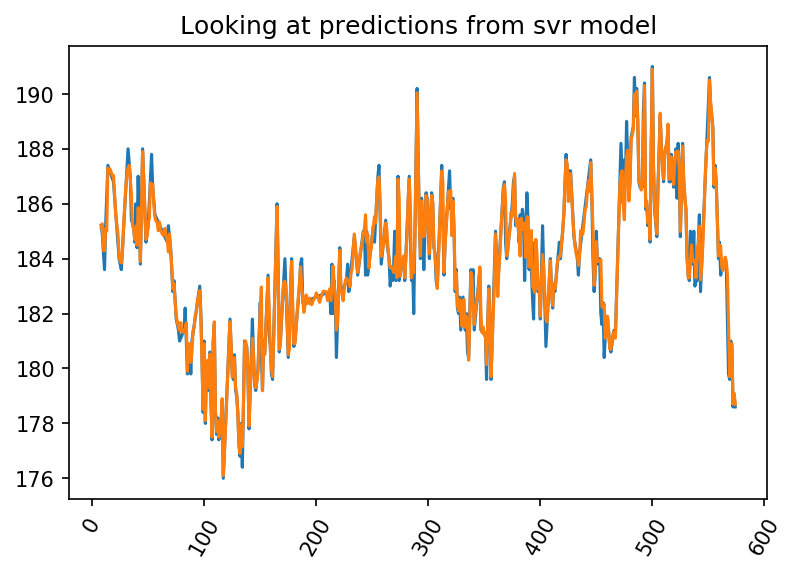

In [1169]:
plt.figure(dpi=150)
plt.plot(X.index, y)
plt.plot(X.index, svr_weight_predictions)
plt.title("Looking at predictions from svr model")
plt.xticks(rotation=60);

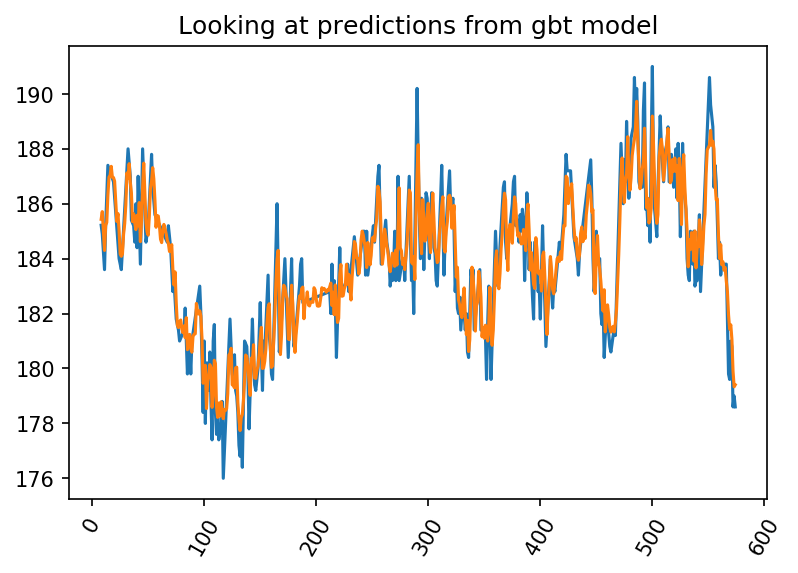

In [1170]:
plt.figure(dpi=150)
plt.plot(X.index, y)
plt.plot(X.index, gbt_weight_predictions)
plt.title("Looking at predictions from gbt model")
plt.xticks(rotation=60);

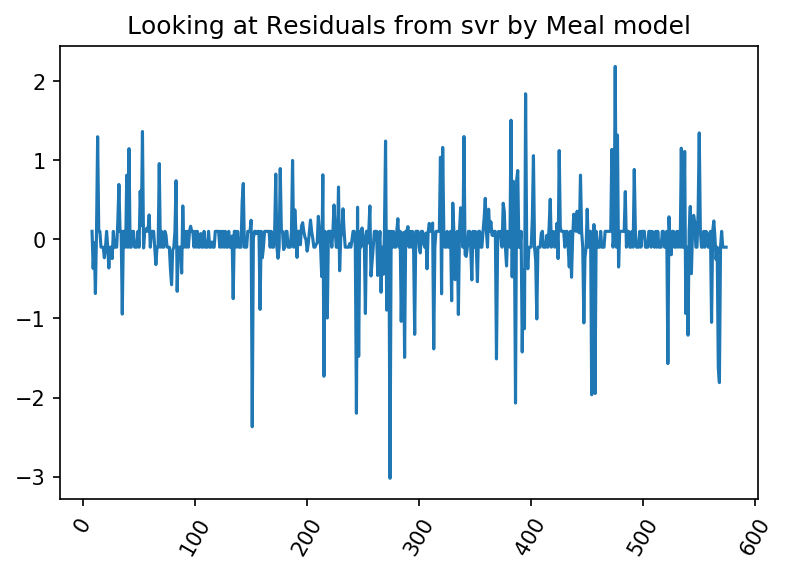

In [1171]:
plt.figure(dpi=150)
plt.plot(X.index, y-svr_weight_predictions)
plt.title("Looking at Residuals from svr by Meal model")
plt.xticks(rotation=60);

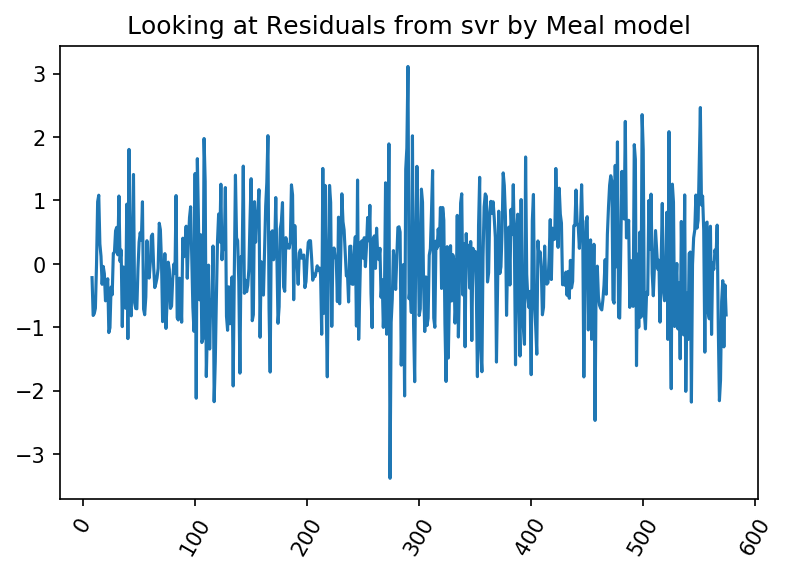

In [1172]:
plt.figure(dpi=150)
plt.plot(X.index, y-gbt_weight_predictions)
plt.title("Looking at Residuals from svr by Meal model")
plt.xticks(rotation=60);

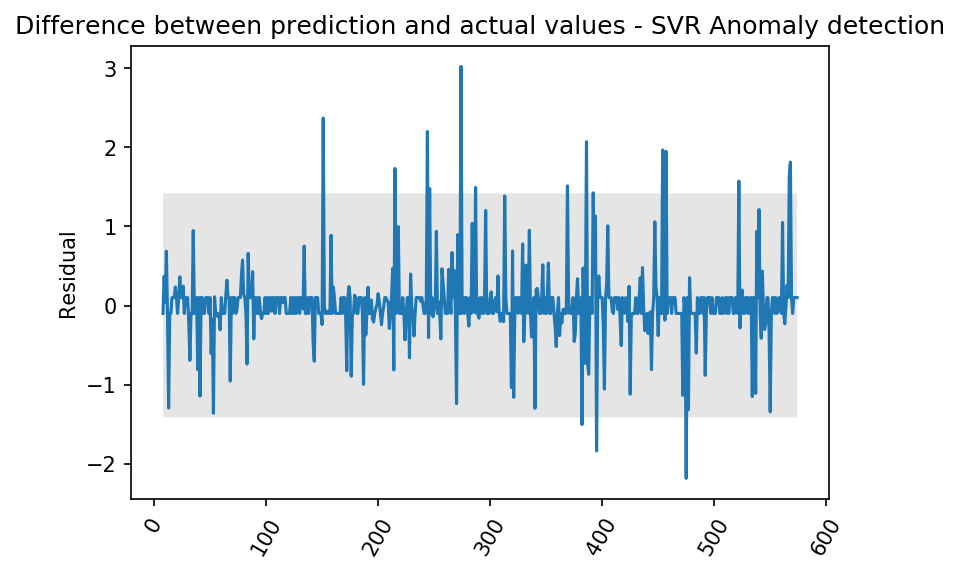

In [1173]:
residual = svr_by_meal.predict(X) - y
std_residual = np.std(residual)

plt.figure(dpi=150)
plt.plot(X.index, residual)
plt.gca().fill_between(X.index, 3*std_residual, -3*std_residual, facecolor='gray', alpha=0.2)
plt.title("Difference between prediction and actual values - SVR Anomaly detection")
plt.ylabel("Residual")
plt.xticks(rotation=60);

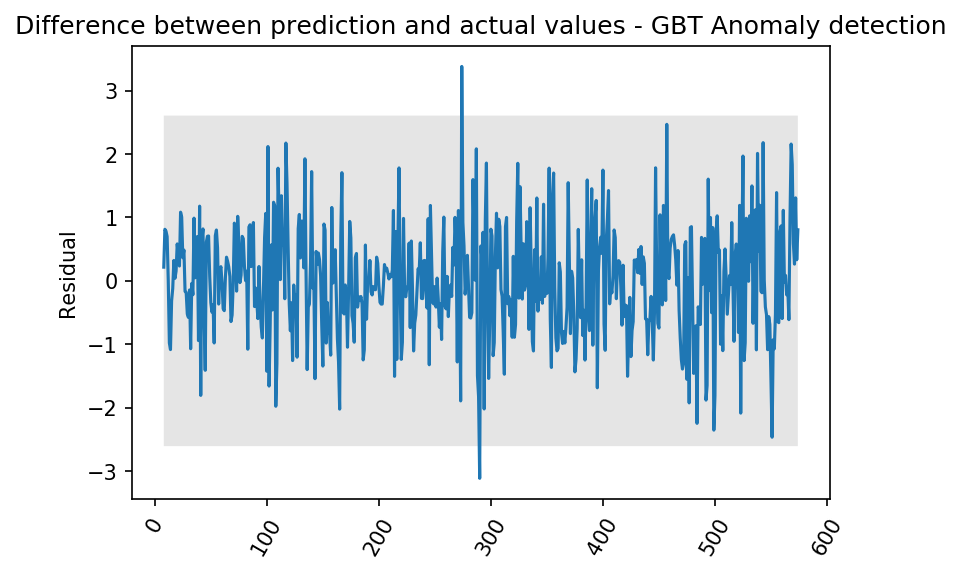

In [1174]:
gbt_residual = gbt_by_meal.predict(X) - y
gbt_std_residual = np.std(gbt_residual)

plt.figure(dpi=150)
plt.plot(X.index, gbt_residual)
plt.gca().fill_between(X.index, 3*gbt_std_residual, -3*gbt_std_residual, facecolor='gray', alpha=0.2)
plt.title("Difference between prediction and actual values - GBT Anomaly detection")
plt.ylabel("Residual")
plt.xticks(rotation=60);

## POTENTIALL PRUNE ANOMALIES?

In [1176]:
real_weight_predictions_svr = pd.Series(svr_weight_predictions, index=train_df.Weight.index[8:])

real_weight_predictions_gbt = pd.Series(gbt_weight_predictions, index=train_df.Weight.index[8:])

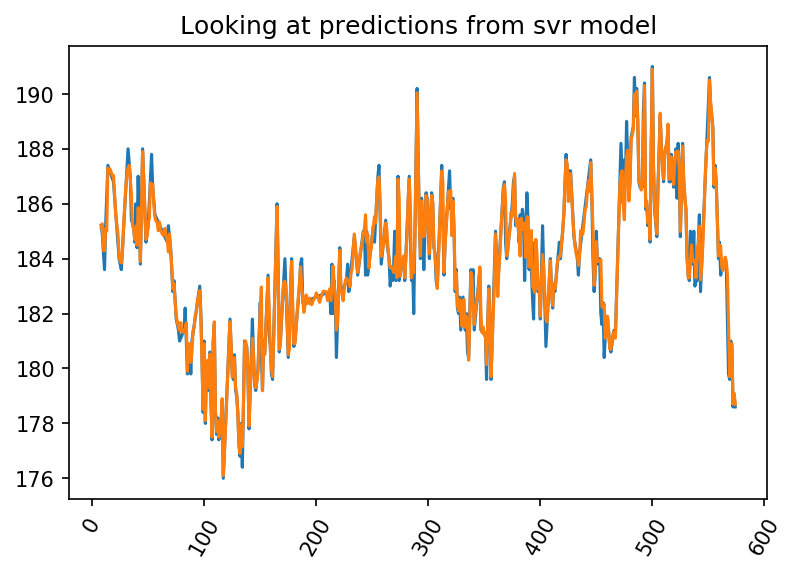

In [1177]:
plt.figure(dpi=150)
plt.plot(X.index, train_df.Weight[8:])
plt.plot(X.index, real_weight_predictions_svr)
plt.title("Looking at predictions from svr model")
plt.xticks(rotation=60);

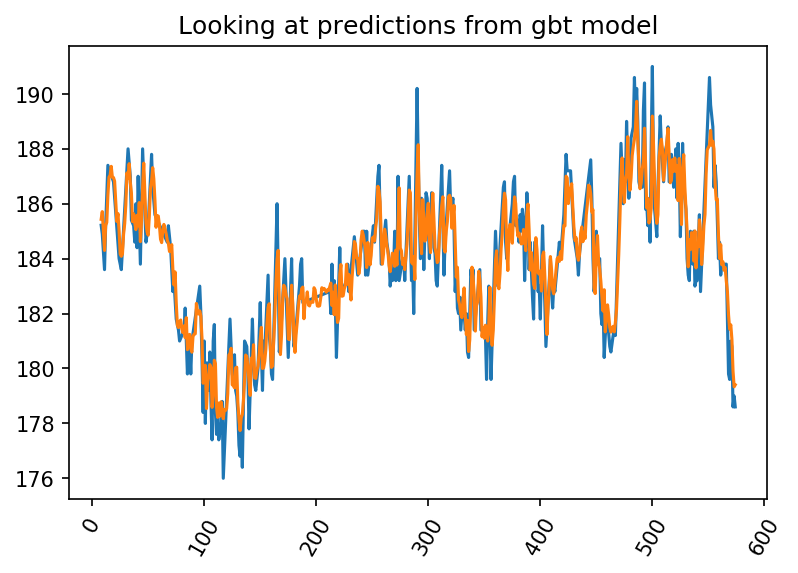

In [1178]:
plt.figure(dpi=150)
plt.plot(X.index, train_df.Weight[8:])
plt.plot(X.index, real_weight_predictions_gbt)
plt.title("Looking at predictions from gbt model")
plt.xticks(rotation=60);

In [1180]:
train_df['Predicted_weights_SVR'] = np.nan
train_df['Predicted_weights_GBT'] = np.nan

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1181]:
train_df['Predicted_weights_SVR'][8:] = svr_weight_predictions
train_df['Predicted_weights_GBT'][8:] = gbt_weight_predictions

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_with(key, value)
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code

In [1182]:
#train_df['Predicted_weights'] = train_df['Predicted_weights'].shift(1)

In [1183]:
train_df.set_index('Date', inplace=True)

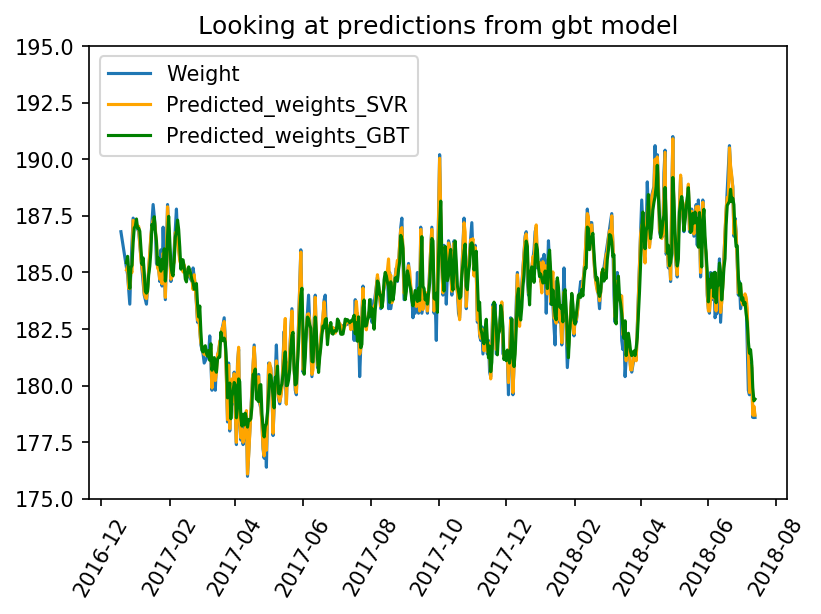

In [1184]:
plt.figure(dpi=150)
plt.plot(train_df.index, train_df.Weight)
plt.plot(train_df.index, train_df.Predicted_weights_SVR, color='orange')
plt.plot(train_df.index, train_df.Predicted_weights_GBT, color='green')
plt.title("Looking at predictions from gbt model")
plt.xticks(rotation=60)
plt.ylim(175, 195)
#plt.xlim(736700,736890)
plt.legend();

In [1185]:
# # fit better sarima
# import statsmodels.api as sm

# exog_vars = train_df[['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
#        'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
#        'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
#        'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
#        'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
#        'Sodium_(mg)_Breakfast',
#        'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
#        'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
#        'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
#        'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
#        'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
#        'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
#        'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
#        'Sugar_Dinner', 'Protein_(g)_Dinner']][:-3]


# sarima1 = sm.tsa.statespace.SARIMAX(dfWeight[:-3], order=(0,0,0), seasonal_order=(1,1,1,7), exog=exog_vars, trend='c').fit()
# sarima1.summary()

## SHUFFLE RANDOM FOREST FEATURES TO VALIDATE -- ASK DAMIEN

In [1186]:
# train_df.reset_index(inplace=True)

# train_df.dropna(subset=['Weight', 'Predicted_weights_GBT'], inplace=True)

# train_df.to_csv('Data/Kojak_train_weights.csv')

In [1187]:
# train_df.set_index('Date', inplace=True)
# train_df.drop('index', axis=1 ,inplace=True)

train_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,Calories_Dinner,Calories_Dinner_lower,...,diff_weight_MA5,diff_weight_MA6,diff_weight_MA7,lag1,lag2,lag3,lag4,lag5,Predicted_weights_SVR,Predicted_weights_GBT
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-16,186.014727,183.563919,187.609668,185.277094,186.690594,-0.046333,-0.134713,0.042960,0.120041,0.018291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-17,186.007385,183.609568,188.096218,185.293783,186.664203,0.139448,-0.129295,0.405446,0.023334,0.003555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-18,186.000042,184.586898,188.967603,185.311487,186.637811,-0.072462,-0.210683,0.067186,-0.208608,-0.404990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-19,185.992700,185.492920,189.815458,185.329230,186.611420,-0.200156,-0.581956,0.185584,0.688588,0.104920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-20,185.985357,184.057679,188.645426,185.356295,186.585029,0.125701,-0.116549,0.365477,0.240258,0.036608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1188]:
dfWeight = train_df.Weight

In [1189]:
# fit better sarima
# import statsmodels.api as sm

# exog_vars = train_df[['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
#        'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
#        'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
#        'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
#        'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
#        'Sodium_(mg)_Breakfast',
#        'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
#        'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
#        'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
#        'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
#        'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
#        'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
#        'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
#        'Sugar_Dinner', 'Protein_(g)_Dinner','diff_weight_lag1', 'diff_weight_weekly_lag']]


# sarima1 = sm.tsa.statespace.SARIMAX(dfWeight, order=(0,0,0), seasonal_order=(1,1,1,7), exog=exog_vars, trend='c').fit()
# sarima1.summary()

In [1207]:
holdout_df.set_index('Date', inplace=True)

In [1208]:
HOLDOUT_X = holdout_df.loc[:, ['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner','Prophet_pred_lag1',
        'Prophet_pred_lag2', 'Prophet_pred_lag3', 'Prophet_pred_lag2', 'Prophet_pred_lag3',
        'Weight_lag1', 'Weight_lag2',
        'Weight_lag3', 'Weight_lag4', 'Weight_lag5']]

HOLDOUT_X = HOLDOUT_X.dropna()
HOLDOUT_y = holdout_df.loc[HOLDOUT_X.index, 'Weight']

#X_holdout_scaled = pd.DataFrame(ssX.transform(HOLDOUT_X), columns = HOLDOUT_X.columns)

models = [svr_by_meal, gbt_by_meal]
names = ['svr Macros by Meal', 'GBT Macros by meal']

print(f'Holdout TEST Scores')

for model, name in zip(models, names):

    HOLDOUT_y_pred_meal = model.predict(HOLDOUT_X)
    holdout_r2_score = np.round(model.score(HOLDOUT_X,HOLDOUT_y),4)
    holdout_adj_r2_score = np.round(1 - (1-model.score(HOLDOUT_X, HOLDOUT_y))*(len(HOLDOUT_y)-1)/(len(HOLDOUT_y)-HOLDOUT_X.shape[1]-1),4)
    holdout_mse_score = mean_squared_error(HOLDOUT_y,HOLDOUT_y_pred_meal)
    holdout_rmse_score = np.round(np.sqrt(holdout_mse_score),4)

    print(f'{name} HOLDOUT SET Final RMSE: {holdout_rmse_score}')
    print(f'{name} HOLDOUT SET Final R^2: {holdout_r2_score}')
    print(f'{name} HOLDOUT SET Final Adj. R^2: {holdout_adj_r2_score}')

Holdout TEST Scores
svr Macros by Meal HOLDOUT SET Final RMSE: 2.167
svr Macros by Meal HOLDOUT SET Final R^2: -0.2641
svr Macros by Meal HOLDOUT SET Final Adj. R^2: 56.6197
GBT Macros by meal HOLDOUT SET Final RMSE: 1.6988
GBT Macros by meal HOLDOUT SET Final R^2: 0.2231
GBT Macros by meal HOLDOUT SET Final Adj. R^2: 35.1834


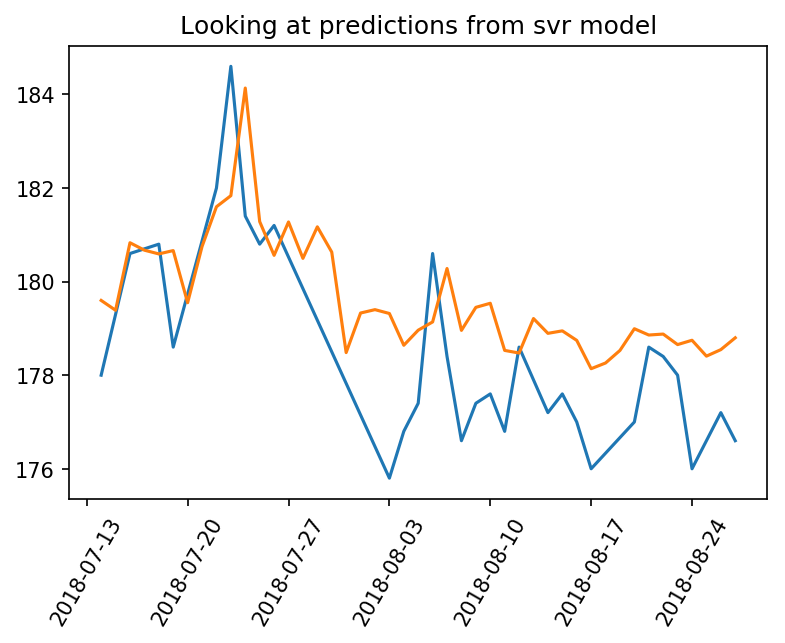

In [1209]:
plt.figure(dpi=150)
plt.plot(HOLDOUT_X.index, HOLDOUT_y)
plt.plot(HOLDOUT_X.index, HOLDOUT_y_pred_meal)
plt.title("Looking at predictions from svr model")
plt.xticks(rotation=60);

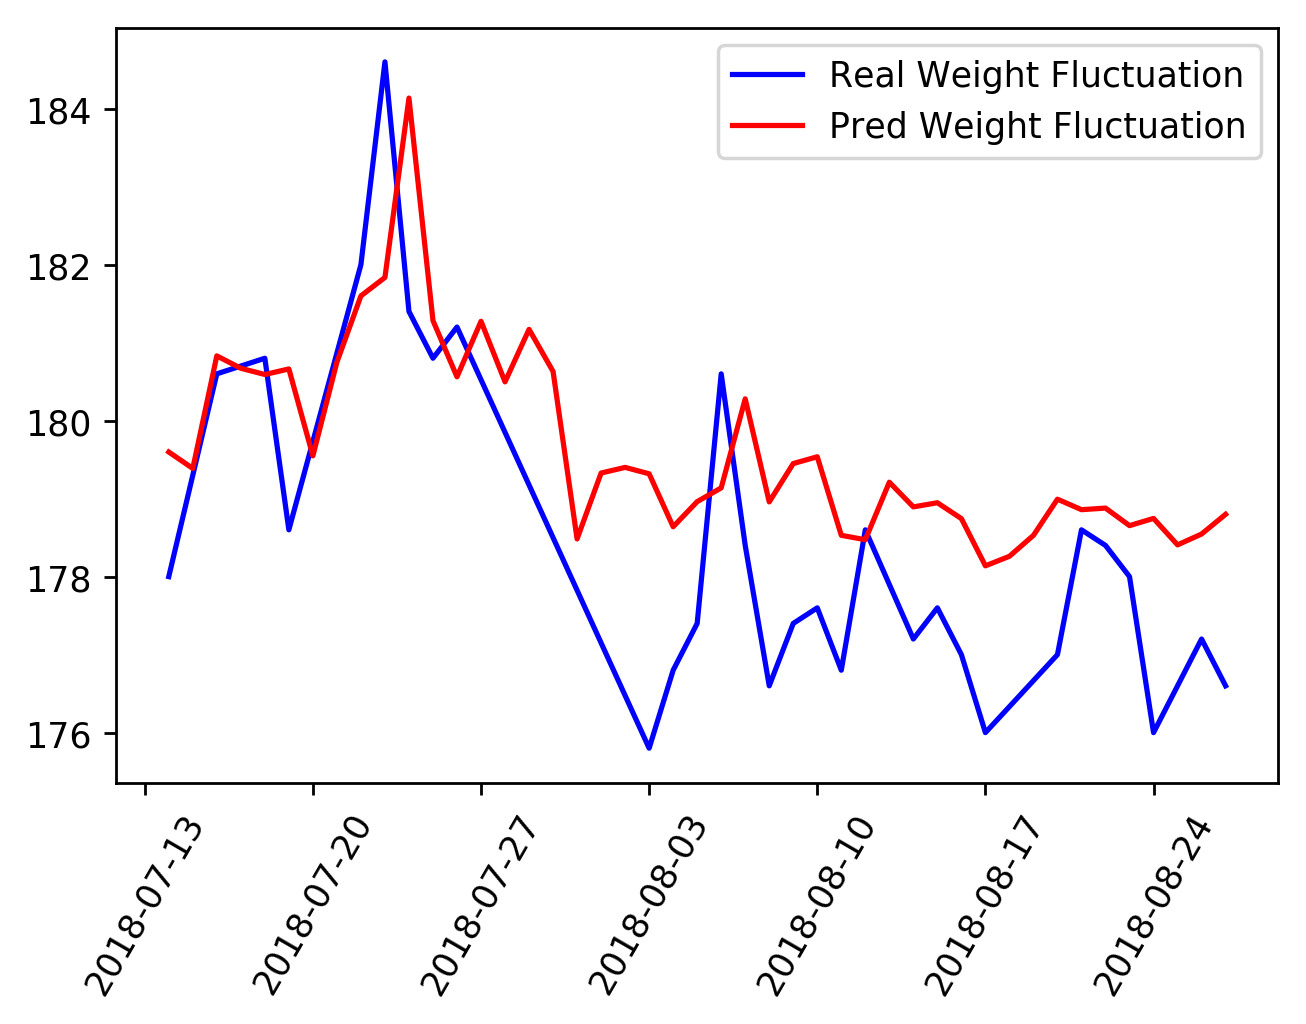

In [1210]:
plt.figure(dpi=250)
plt.plot(HOLDOUT_y,color='blue',label='Real Weight Fluctuation')
hold_y_pred = pd.Series(HOLDOUT_y_pred_meal, index=HOLDOUT_y.index)
plt.plot(hold_y_pred, color='red',label='Pred Weight Fluctuation')
plt.xticks(rotation=60)
plt.legend()

In [1211]:
final_weight_predictions_cumsum = HOLDOUT_y_pred_meal.cumsum()

In [1212]:
holdout_df.Weight

Date
2018-07-14    178.000000
2018-07-15    179.300000
2018-07-16    180.600000
2018-07-17    180.700000
2018-07-18    180.800000
2018-07-19    178.600000
2018-07-20    179.733333
2018-07-21    180.866667
2018-07-22    182.000000
2018-07-23    184.600000
2018-07-24    181.400000
2018-07-25    180.800000
2018-07-26    181.200000
2018-07-27    180.525000
2018-07-28    179.850000
2018-07-29    179.175000
2018-07-30    178.500000
2018-07-31    177.825000
2018-08-01    177.150000
2018-08-02    176.475000
2018-08-03    175.800000
2018-08-04    176.800000
2018-08-05    177.400000
2018-08-06    180.600000
2018-08-07    178.400000
2018-08-08    176.600000
2018-08-09    177.400000
2018-08-10    177.600000
2018-08-11    176.800000
2018-08-12    178.600000
2018-08-13    177.900000
2018-08-14    177.200000
2018-08-15    177.600000
2018-08-16    177.000000
2018-08-17    176.000000
2018-08-18    176.333333
2018-08-19    176.666667
2018-08-20    177.000000
2018-08-21    178.600000
2018-08-22    178.40

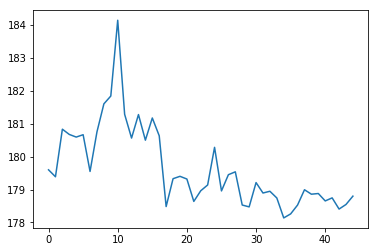

In [1213]:
plt.plot(HOLDOUT_y_pred_meal)

In [1214]:
np.mean(HOLDOUT_y)

178.47111111111116

In [1215]:
np.mean(HOLDOUT_y_pred_meal)

179.64733111018037

In [1216]:
final_weight_predictions_cumsum

array([ 179.59781697,  358.98504265,  539.81535797,  720.48649148,
        901.0779897 , 1081.74076072, 1261.28939664, 1442.03871819,
       1623.63788268, 1805.47403967, 1989.6098874 , 2170.89221395,
       2351.45373609, 2532.72770711, 2713.22466079, 2894.39513909,
       3075.02581506, 3253.50898472, 3432.83729061, 3612.23790427,
       3791.5564154 , 3970.19585124, 4149.15746357, 4328.29539511,
       4508.57490649, 4687.53284729, 4866.98257856, 5046.51941378,
       5225.04905173, 5403.52239466, 5582.7329015 , 5761.62714455,
       5940.57442899, 6119.31836432, 6297.45695538, 6475.71763386,
       6654.24691584, 6833.2398247 , 7012.0981183 , 7190.97682504,
       7369.63082052, 7548.37726803, 7726.78447376, 7905.33072413,
       8084.12989996])

In [1217]:
final_weight_predictions = pd.Series(HOLDOUT_y_pred_meal, index=holdout_df.Weight.index)

# final_weight_predictions = final_weight_predictions.shift(-1)

final_weight_predictions

Date
2018-07-14    179.597817
2018-07-15    179.387226
2018-07-16    180.830315
2018-07-17    180.671134
2018-07-18    180.591498
2018-07-19    180.662771
2018-07-20    179.548636
2018-07-21    180.749322
2018-07-22    181.599164
2018-07-23    181.836157
2018-07-24    184.135848
2018-07-25    181.282327
2018-07-26    180.561522
2018-07-27    181.273971
2018-07-28    180.496954
2018-07-29    181.170478
2018-07-30    180.630676
2018-07-31    178.483170
2018-08-01    179.328306
2018-08-02    179.400614
2018-08-03    179.318511
2018-08-04    178.639436
2018-08-05    178.961612
2018-08-06    179.137932
2018-08-07    180.279511
2018-08-08    178.957941
2018-08-09    179.449731
2018-08-10    179.536835
2018-08-11    178.529638
2018-08-12    178.473343
2018-08-13    179.210507
2018-08-14    178.894243
2018-08-15    178.947284
2018-08-16    178.743935
2018-08-17    178.138591
2018-08-18    178.260678
2018-08-19    178.529282
2018-08-20    178.992909
2018-08-21    178.858294
2018-08-22    178.87

In [1218]:
holdout_df.Weight

Date
2018-07-14    178.000000
2018-07-15    179.300000
2018-07-16    180.600000
2018-07-17    180.700000
2018-07-18    180.800000
2018-07-19    178.600000
2018-07-20    179.733333
2018-07-21    180.866667
2018-07-22    182.000000
2018-07-23    184.600000
2018-07-24    181.400000
2018-07-25    180.800000
2018-07-26    181.200000
2018-07-27    180.525000
2018-07-28    179.850000
2018-07-29    179.175000
2018-07-30    178.500000
2018-07-31    177.825000
2018-08-01    177.150000
2018-08-02    176.475000
2018-08-03    175.800000
2018-08-04    176.800000
2018-08-05    177.400000
2018-08-06    180.600000
2018-08-07    178.400000
2018-08-08    176.600000
2018-08-09    177.400000
2018-08-10    177.600000
2018-08-11    176.800000
2018-08-12    178.600000
2018-08-13    177.900000
2018-08-14    177.200000
2018-08-15    177.600000
2018-08-16    177.000000
2018-08-17    176.000000
2018-08-18    176.333333
2018-08-19    176.666667
2018-08-20    177.000000
2018-08-21    178.600000
2018-08-22    178.40

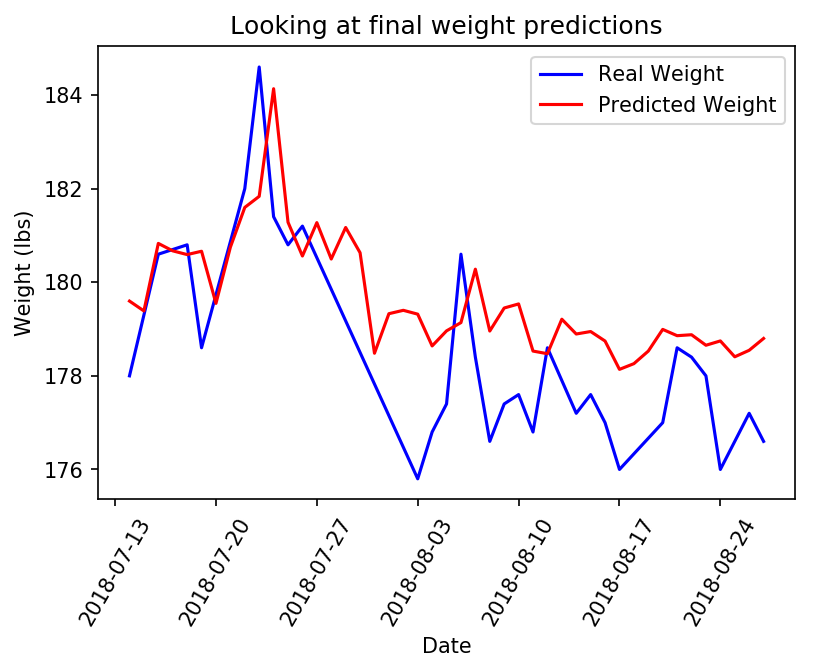

In [1219]:
plt.figure(dpi=150)
plt.plot(holdout_df.index, holdout_df.Weight, color='blue',label='Real Weight')
plt.plot(holdout_df.index, final_weight_predictions, color='red',label='Predicted Weight')
plt.title("Looking at final weight predictions")
plt.xlabel('Date')
plt.ylabel('Weight (lbs)')
plt.xticks(rotation=60)
plt.legend();

In [1220]:
holdout_df['Final_predicted_weights'] = np.nan

holdout_df['Final_predicted_weights'] = HOLDOUT_y_pred_meal

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
plt.figure(dpi=150)
plt.plot(holdout_df.index, holdout_df.Weight)
plt.plot(holdout_df.index, holdout_df.Final_predicted_weights)
plt.title("Looking at final day-ahead predictions")
plt.xticks(rotation=60);

In [ ]:
holdout_df.Weight.values

In [ ]:
HOLDOUT_y_pred_meal

In [ ]:
holdout_df.Weight.values[0] + HOLDOUT_y_pred_meal[0]

In [ ]:
holdout_df.Weight.values + HOLDOUT_y_pred_meal

In [ ]:
def _forecast_error(self, steps=1):
    sigma2 = self.sigma2
    ma_rep = arma2ma(np.r_[1, -self.arparams],
                     np.r_[1, self.maparams], lags=steps)

    fcasterr = np.sqrt(sigma2 * np.cumsum(ma_rep**2))
    return fcasterr

def _forecast_conf_int(self, forecast, fcasterr, alpha):
    const = norm.ppf(1 - alpha / 2.)
    conf_int = np.c_[forecast - const * fcasterr,
                     forecast + const * fcasterr]

    return conf_int

In [ ]:
import numpy as np
import scipy.stats

def mean_confidence_interval(forecast, confidence=0.95):
    #a = 1.0 * np.array(data)
    n = len(forecast)
    m, se = np.mean(forecast), scipy.stats.sem(forecast)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
mean_confidence_interval(holdout_df.Final_predicted_weights)

In [ ]:
def forecast_conf_int(forecast, fcasterr, alpha):
    const = norm.ppf(1 - alpha / 2.)
    conf_int = np.c_[forecast - const * fcasterr,
                        forecast + const * fcasterr]

In [ ]:
# fit sarima
# import statsmodels.api as sm

# #train_df.set_index('Date', inplace=True)

# exog_vars = train_df[['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
#        'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
#        'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
#        'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
#        'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
#        'Sodium_(mg)_Breakfast',
#        'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
#        'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
#        'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
#        'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
#        'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
#        'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
#        'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
#        'Sugar_Dinner', 'Protein_(g)_Dinner', 'diff_weight_MA2',
#              'diff_weight_MA3', 'diff_weight_MA4', 'diff_weight_MA5', 'diff_weight_MA6', 'diff_weight_MA7']][:-3]


# sarima1 = sm.tsa.statespace.SARIMAX(train_df.Weight[:-3], order=(5,1,7), seasonal_order=(1,0,0,7), exog=exog_vars, trend='c').fit()
# sarima1.summary()

In [ ]:
# exog_vars = holdout_df[['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
#        'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
#        'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
#        'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
#        'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
#        'Sodium_(mg)_Breakfast',
#        'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
#        'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
#        'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
#        'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
#        'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
#        'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
#        'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
#        'Sugar_Dinner', 'Protein_(g)_Dinner', 'diff_weight_MA2',
#              'diff_weight_MA3', 'diff_weight_MA4', 'diff_weight_MA5', 'diff_weight_MA6', 'diff_weight_MA7']]

# forecast = sarima1.forecast(steps=len(HOLDOUT_X),exog=exog_vars)

In [ ]:
forecast = forecast.shift(3)

In [ ]:
forecast

In [ ]:
plt.figure(dpi=250)
plt.plot(holdout_df.Weight)
plt.plot(forecast)
plt.xticks(rotation=60)

In [ ]:
plt.figure(dpi=250)
plt.plot(holdout_df.Weight)
plt.plot(forecast)
plt.xticks(rotation=60)

In [ ]:
forecast_cumsum = forecast

In [ ]:
train_df.index

In [ ]:
df.columns